In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Reading the csv files
# First reading the english file
df_en=pd.read_csv("./dataset/jigsaw-toxic-comment-train-processed-seqlen128.csv")
df_en.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,input_word_ids,input_mask,all_segment_id
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,"(101, 27746, 31609, 11809, 24781, 10105, 70971...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,"(101, 141, 112, 56237, 10874, 106, 10357, 1825...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"(101, 35936, 10817, 117, 146, 112, 181, 30181,...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,"(101, 107, 15946, 146, 10944, 112, 188, 13086,...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"(101, 11065, 117, 52523, 117, 10301, 15127, 51...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [12]:
# emotions dataset
df_emo=pd.read_csv("./dataset/emotion_sentimen_dataset.csv")
df_emo.head(10)

,Unnamed: 0,text,Emotion
0,0,i seriously hate one subject to death but now ...,hate
1,1,im so full of life i feel appalled,neutral
2,2,i sit here to write i start to dig out my feel...,neutral
3,3,ive been really angry with r and i feel like a...,anger
4,4,i feel suspicious if there is no one outside l...,neutral
5,5,i feel jealous becasue i wanted that kind of l...,love
6,6,when a friend of mine keeps telling me morbid ...,neutral
7,7,i finally fell asleep feeling angry useless an...,worry
8,8,i feel a bit annoyed and antsy in a good way,neutral
9,9,i feel like i ve regained another vital part o...,neutral


## Preprocessing Emotions Dataset
- Remove the unwanted columns
- Use AI to make a new column of emotions
- Converting to regression.
- Compare the lengths of neutral lengths to that of emotionally charged lengths

In [13]:
# Removing unwanted columns
df_emo.drop(columns=["Unnamed: 0"], inplace=True)
df_emo

,text,Emotion
0,i seriously hate one subject to death but now ...,hate
1,im so full of life i feel appalled,neutral
2,i sit here to write i start to dig out my feel...,neutral
3,ive been really angry with r and i feel like a...,anger
4,i feel suspicious if there is no one outside l...,neutral
...,...,...
839550,i feel like telling these horny devils to find...,neutral
839551,i began to realize that when i was feeling agi...,neutral
839552,i feel very curious be why previous early dawn...,neutral
839553,i feel that becuase of the tyranical nature of...,neutral


In [5]:
# the code here if using ai generated new column emotions

In [14]:
emo_textlen_mean=df_emo[df_emo['Emotion']!='neutral']['text'].apply(func=len).mean()
emo_textlen_std=df_emo[df_emo['Emotion']!='neutral']['text'].apply(func=len).std()
print(f"Emotional Sentences:\nMean: {emo_textlen_mean:.3f}\tStd Deviation: {emo_textlen_std:.3f}\n-------------------------")

nemo_textlen_mean=df_emo[df_emo['Emotion']=='neutral']['text'].apply(func=len).mean()
nemo_textlen_std=df_emo[df_emo['Emotion']=='neutral']['text'].apply(func=len).std()
print(f"Non Emotional Sentences:\nMean: {nemo_textlen_mean:.3f}\tStd Deviation: {nemo_textlen_std:.3f}")

Emotional Sentences:
Mean: 113.621	Std Deviation: 60.511
-------------------------
Non Emotional Sentences:
Mean: 92.973	Std Deviation: 54.326


### Creating a model to detect emotions
- Using decision tree regressor
- 

## Preprocessing English text Dataset
- We will remove the id because that should not be a parameter for the right analysis.
- Make a new column on bad words alert. Having integer values of no. of times used.
- Make a new column on length of the text.
- No. of Caps in the text.
- No. of special chars.
- No. of non numeric words. len > 2
- No. of non numeric word repeatations. len > 2
- Emotional recognition

In [15]:
# removing unnecessary columns
df_en=df_en.loc[:,"comment_text":"identity_hate"]
df_en.head(10)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0


In [16]:
# renaming from 'comment_text' to just 'text' and 'identity_hate' to just 'hate'
df_en.rename(columns={"comment_text": "text", "identity_hate": "hate", "severe_toxic": "vtoxic"}, inplace=True)
df_en

,text,toxic,vtoxic,obscene,threat,insult,hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
223544,":Jerome, I see you never got around to this…! ...",0,0,0,0,0,0
223545,==Lucky bastard== \n http://wikimediafoundatio...,0,0,0,0,0,0
223546,==shame on you all!!!== \n\n You want to speak...,0,0,0,0,0,0
223547,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1,0,1,0,1,0


In [17]:
%pip install emoji

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
from emoji import demojize
def numcaps(string: str):
    count=0
    l=len(string)
    for i in range(l-1):
        if string[i].isupper() and string[i+1]:
            count+=1
    return count
def isNotPunc(char):
  # Define a broader set of punctuation characters
  punctuation = r"!\#$%&\*+-/:;<=>?@[\\]^_`{|}~"
  return char in punctuation
def isEmoji(char):
    return demojize(char) != char
def numwords(string: str):
    return len(string.split(' '))
def numlines(string: str):
    return len(string.split('\n'))
def numschars(string: str):
    return sum([1 for i in string if isNotPunc(i)])
def numemojis(string: str):
    return sum([1 for i in string if isEmoji(i)])

In [20]:
# now making column for it
df_en['length']=df_en['text'].apply(len)
print("Length feature is added.")

df_en['numcaps']=df_en['text'].apply(numcaps)
print("Number of caps feature is added.")

df_en['numwords']=df_en['text'].apply(numwords)
print("Number of words feature is added.")

df_en['numlines']=df_en['text'].apply(numlines)
print("Number of lines feature is added.")

df_en['numschars']=df_en['text'].apply(numschars)
print("Number of charachters feature is added.")

#df_en['numemojis']=df_en['text'].apply(numemojis)
#print("Number of emojis feature is added.")

print("\n\nThe Data now looks as: \n")
df_en.head(10)

Length feature is added.
Number of caps feature is added.
Number of words feature is added.
Number of lines feature is added.
Number of charachters feature is added.


The Data now looks as: 



,text,toxic,vtoxic,obscene,threat,insult,hate,length,numcaps,numwords,numlines,numschars
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,17,42,2,1
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,8,18,1,2
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,4,42,1,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,11,112,5,8
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,2,13,1,1
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,65,1,12,3,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,44,36,8,1,0
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,115,4,21,1,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,472,7,83,1,1
9,alignment on this subject and which are contra...,0,0,0,0,0,0,70,2,12,1,0


# Analysis Phase

## Analysing by Length

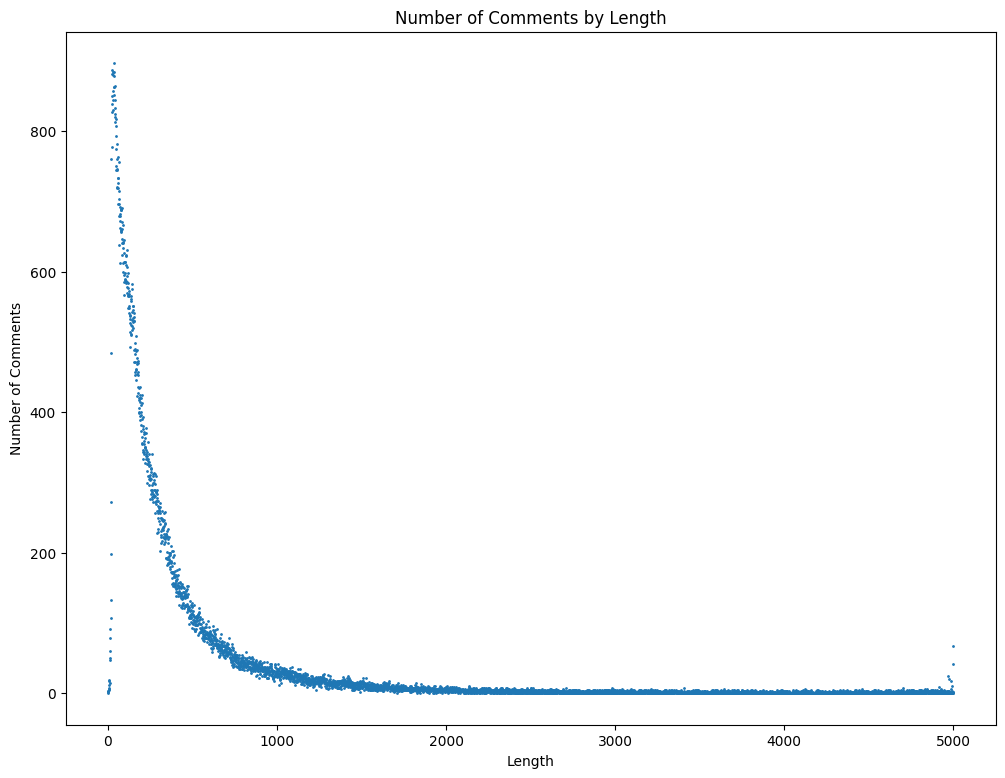

In [23]:
# Corrected plotting code
max_length = df_en['length'].max()
comments_counts = [len(df_en[(df_en.length == i)]) for i in range(0, max_length + 1)]
graph=plt
graph.figure(figsize=(12,9))
graph.scatter(range(0, max_length + 1), comments_counts, s=1)
graph.xlabel('Length')
graph.ylabel('Number of Comments')
graph.title('Number of Comments by Length') 
graph.savefig('Analysis Graphs/length.png')
graph.show()

## Analyzing Toxic Comments count over length

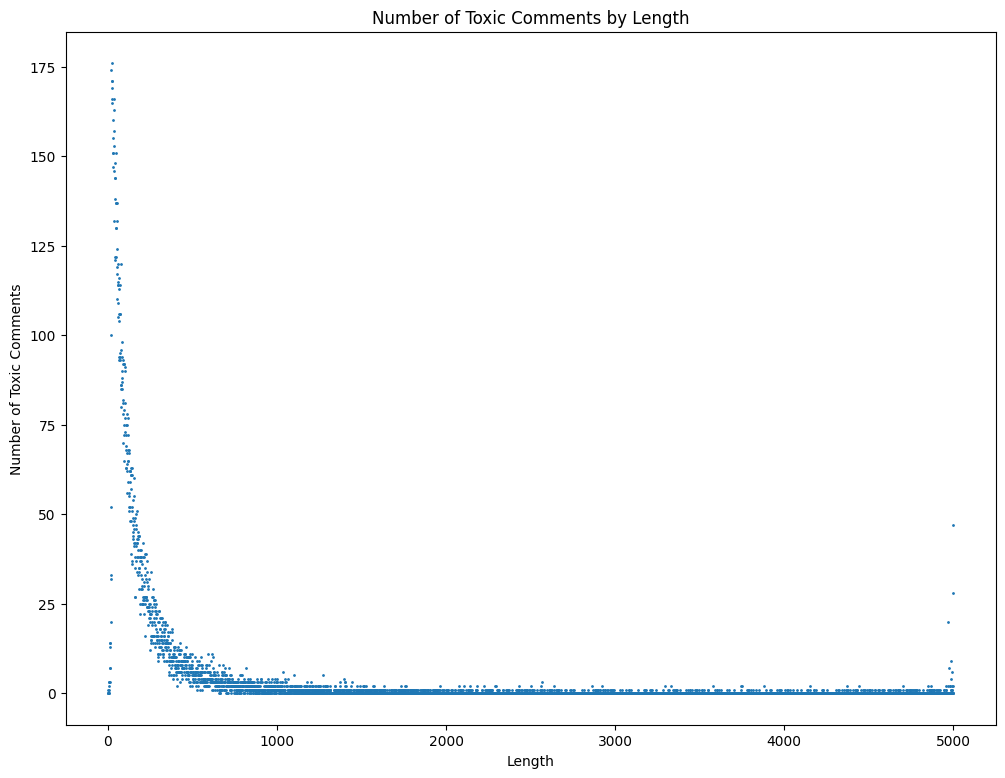

In [24]:
# Corrected plotting code
max_length = df_en['length'].max()
toxic_counts = [len(df_en[(df_en.toxic == 1) & (df_en.length == i)]) for i in range(0, max_length + 1)]

graph=plt
graph.figure(figsize=(12,9))
graph.scatter(range(0, max_length + 1), toxic_counts, s=1)
graph.xlabel('Length')
graph.ylabel('Number of Toxic Comments')
graph.title('Number of Toxic Comments by Length') 
graph.savefig('Analysis Graphs/toxic/length.png')
graph.show()

## Percentage of Toxic Comments count over length

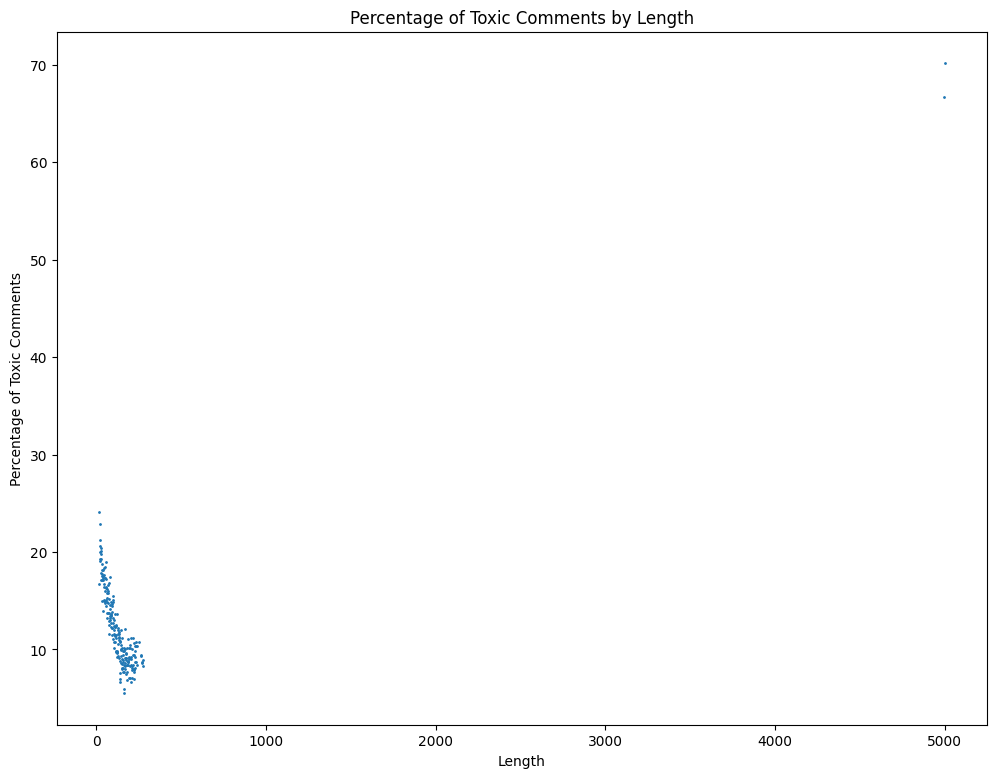

In [25]:
# Corrected plotting code
max_length = df_en['length'].max()
toxic_comment_ratios=[]
toxic_length=[]
for i in range(max_length+1):
    total_counts=len(df_en[(df_en.length == i)])
    if total_counts==0:
        pass
    else:
        toxic_counts=len(df_en[(df_en.toxic == 1) & (df_en.length == i)])
        if toxic_counts>25:
            toxic_length.append(i)
            toxic_comment_ratios.append(toxic_counts*100/total_counts)
        
graph=plt
graph.figure(figsize=(12,9))
graph.scatter(toxic_length, toxic_comment_ratios, s=1)
graph.xlabel('Length')
graph.ylabel('Percentage of Toxic Comments')
graph.title('Percentage of Toxic Comments by Length') 
graph.savefig('Analysis Graphs/toxic/length.png')
graph.show()

## Number of Toxic comments over number of caps

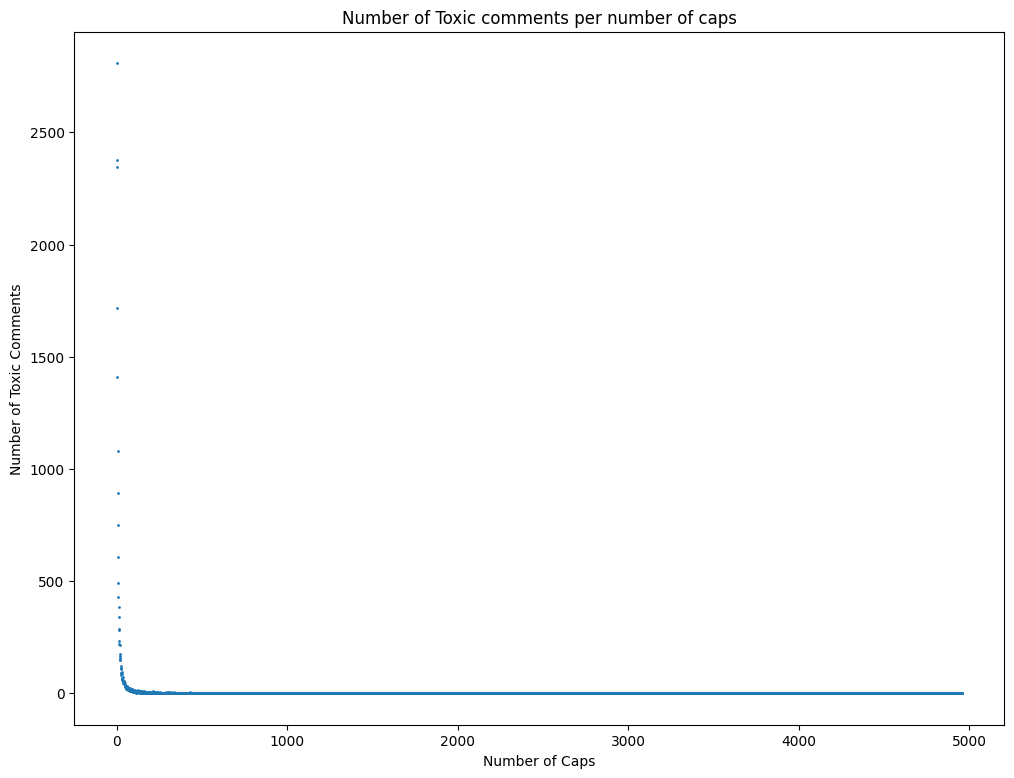

In [28]:
max_caps=df_en.numcaps.max()
toxic_counts = [ len(df_en[(df_en.toxic==1) & (df_en.numcaps==i)]) for i in range(0, max_caps+1)]

graph=plt
graph.figure(figsize=(12,9))
graph.scatter(range(0, max_caps + 1), toxic_counts, s=1)
graph.xlabel("Number of Caps")
graph.ylabel("Number of Toxic Comments")
graph.title("Number of Toxic comments per number of caps")
graph.savefig('Analysis Graphs/toxic/numcaps_full.png')
graph.show()

## Number of Toxic comments over number of caps (within a range of 100 caps)

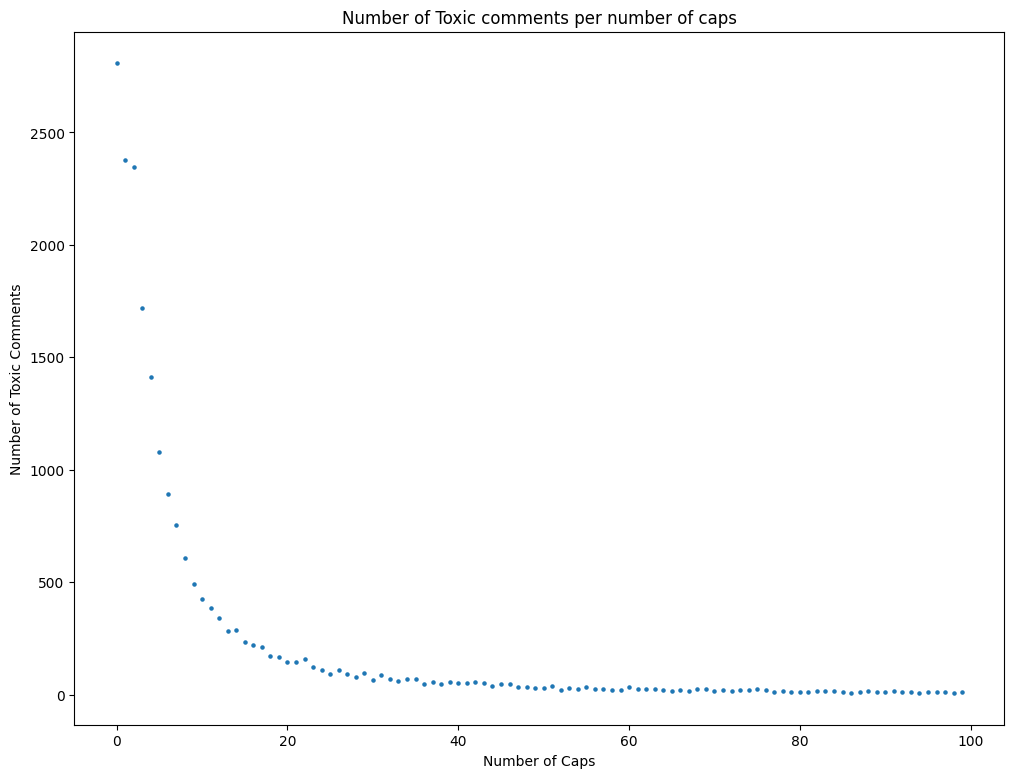

In [31]:
max_caps=df_en.numcaps.max()
toxic_counts = [ len(df_en[(df_en.toxic==1) & (df_en.numcaps==i)]) for i in range(0, 100)]

graph=plt
graph.figure(figsize=(12,9))
graph.scatter(range(0, 100), toxic_counts, s=5)
graph.xlabel("Number of Caps")
graph.ylabel("Number of Toxic Comments")
graph.title("Number of Toxic comments per number of caps")
graph.savefig('Analysis Graphs/toxic/numcaps100.png')
graph.show()

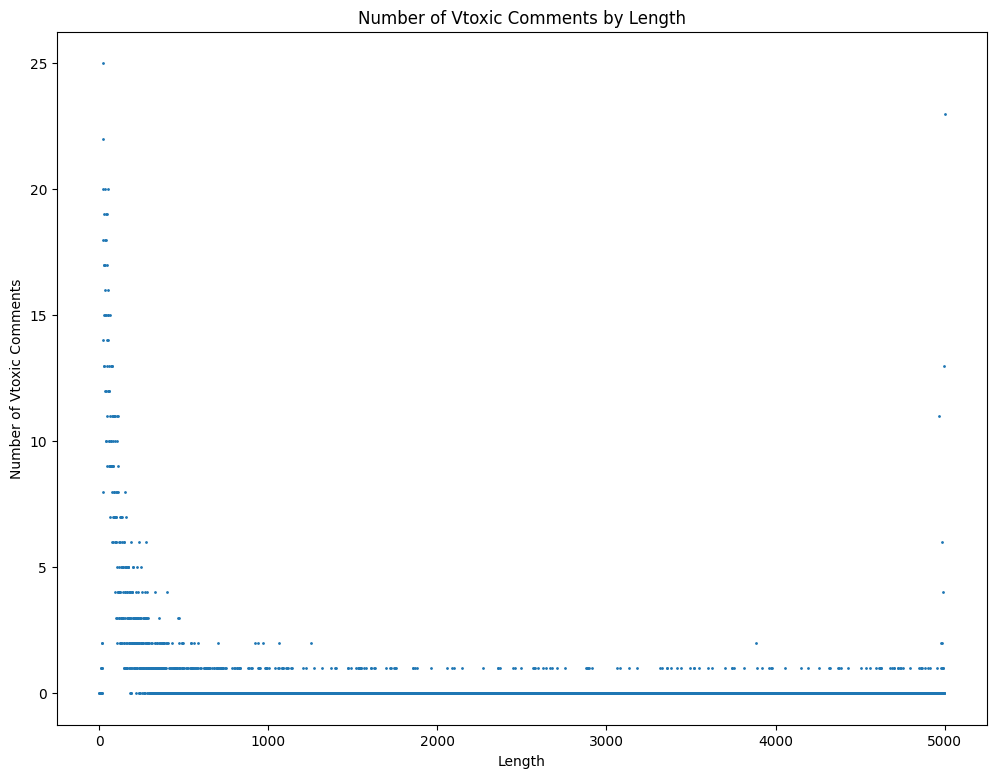

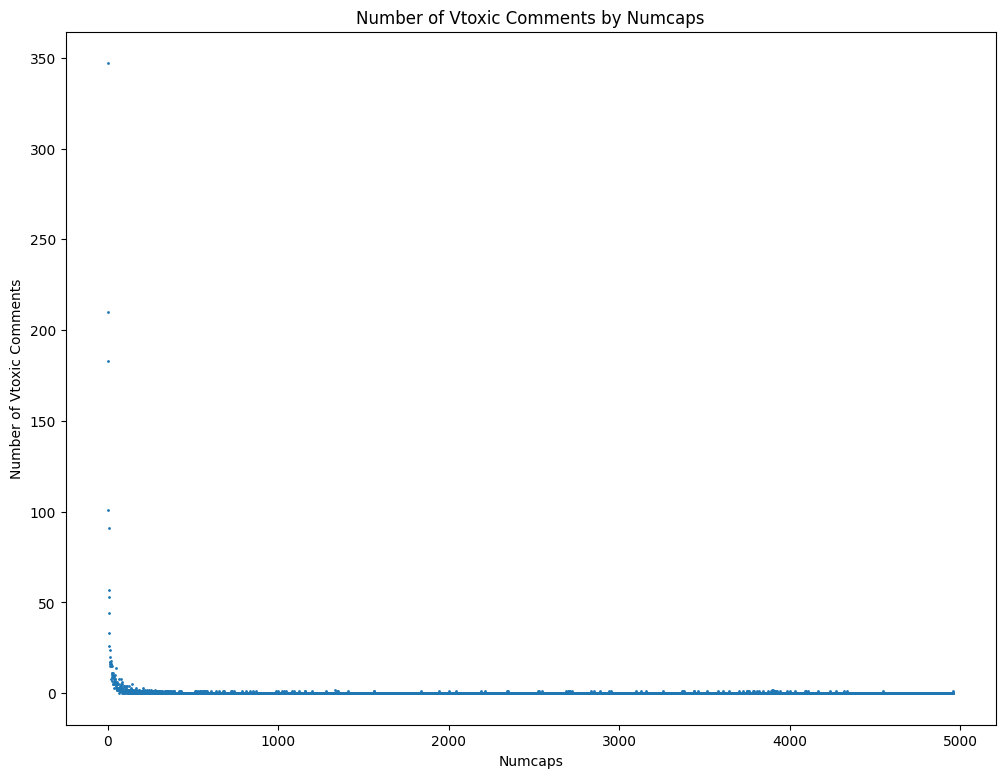

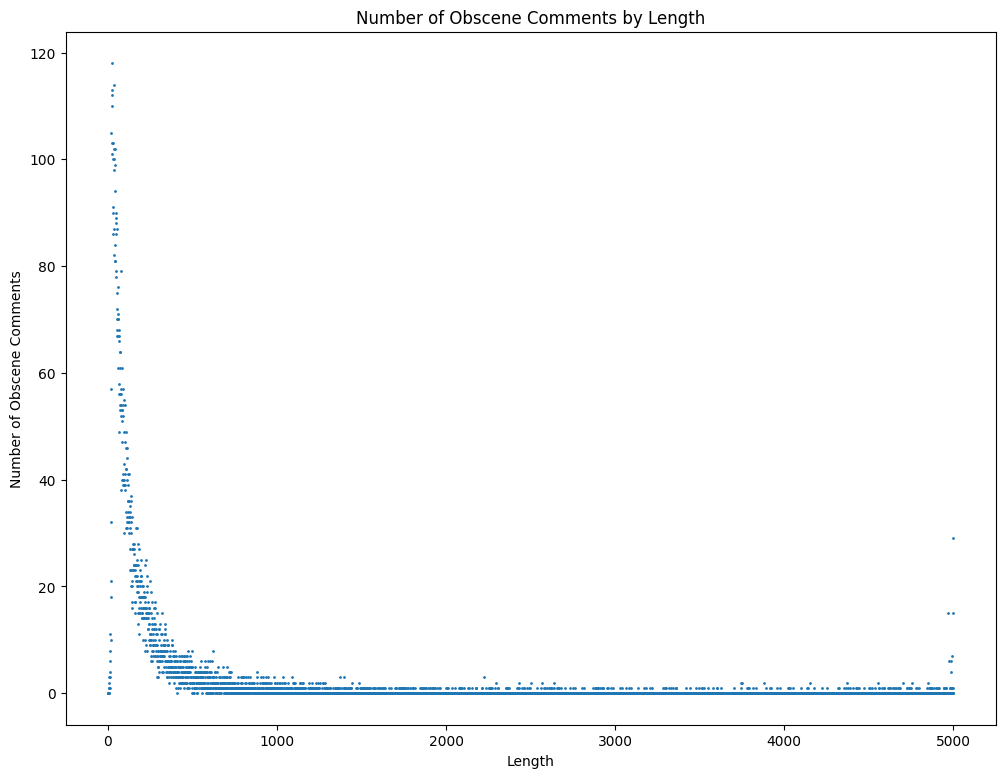

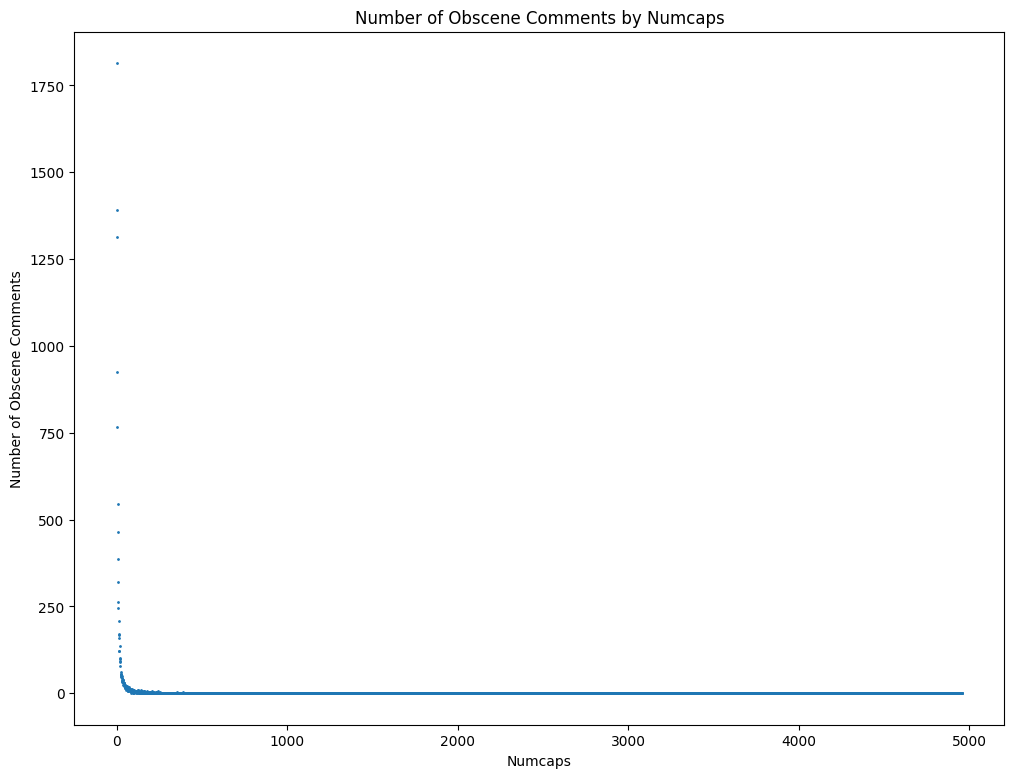

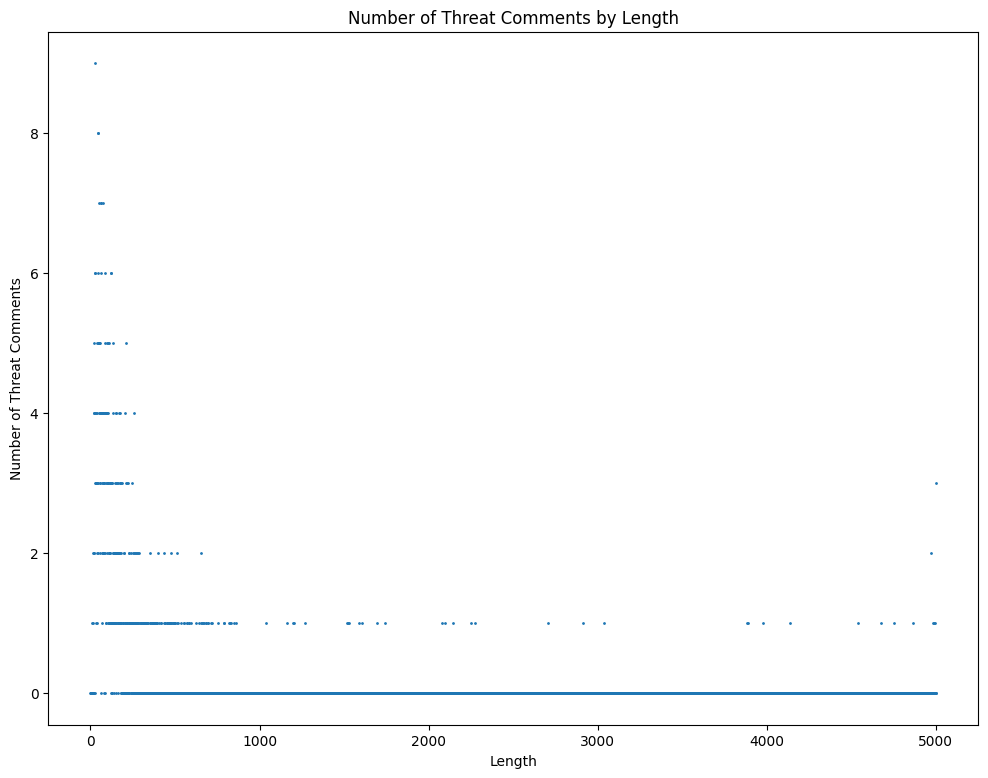

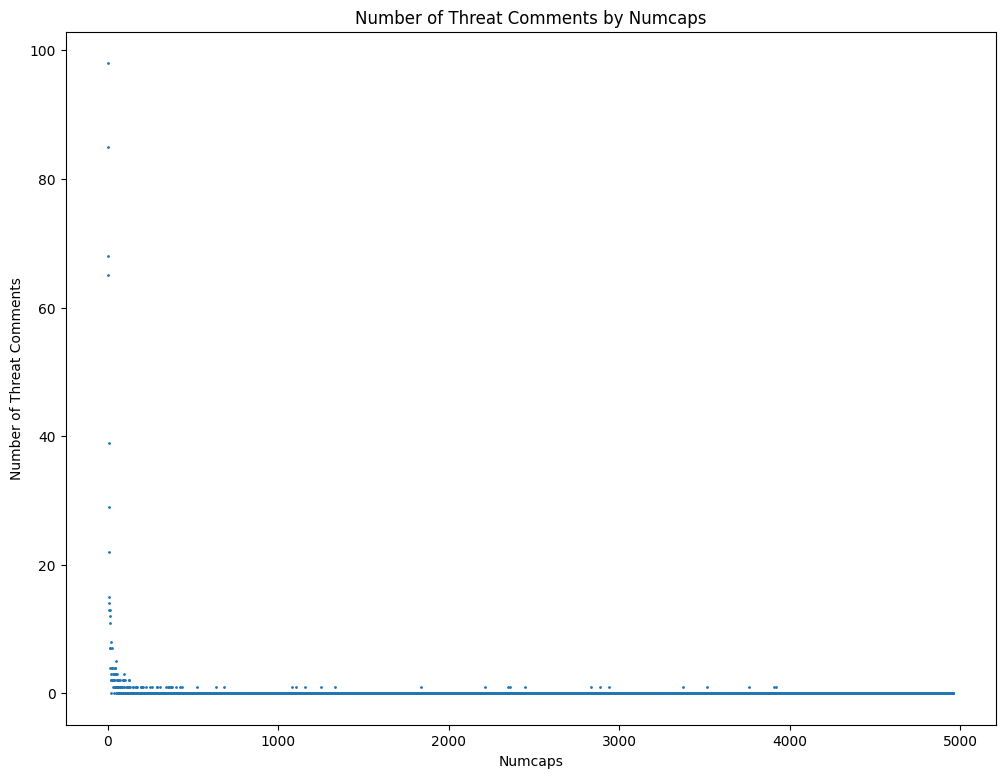

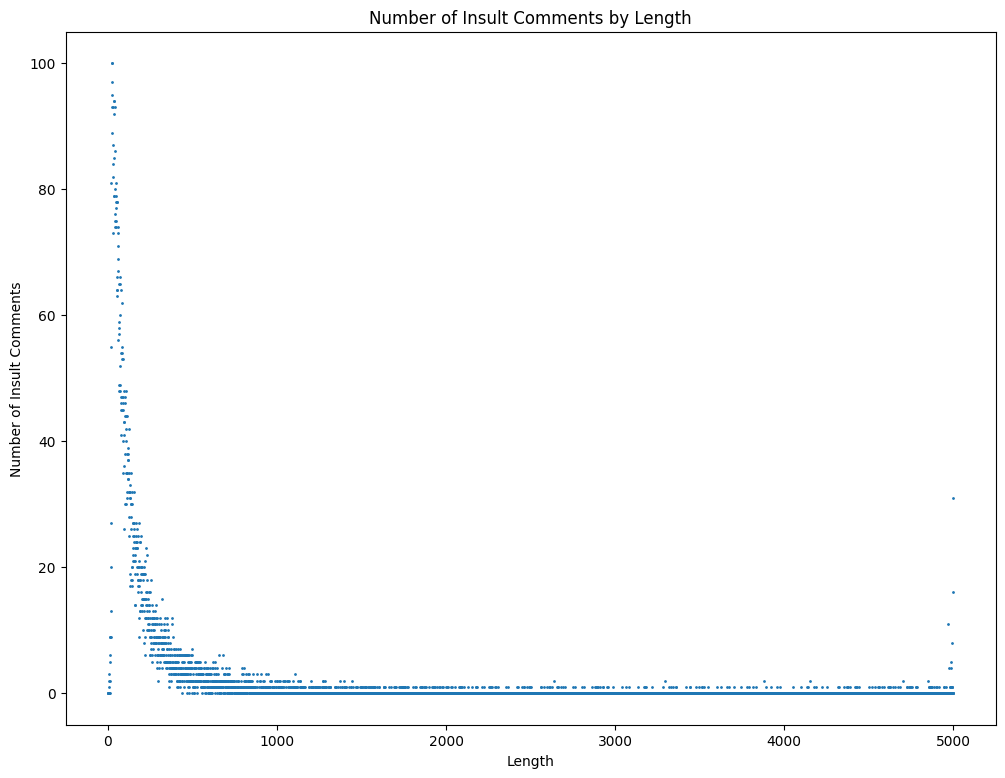

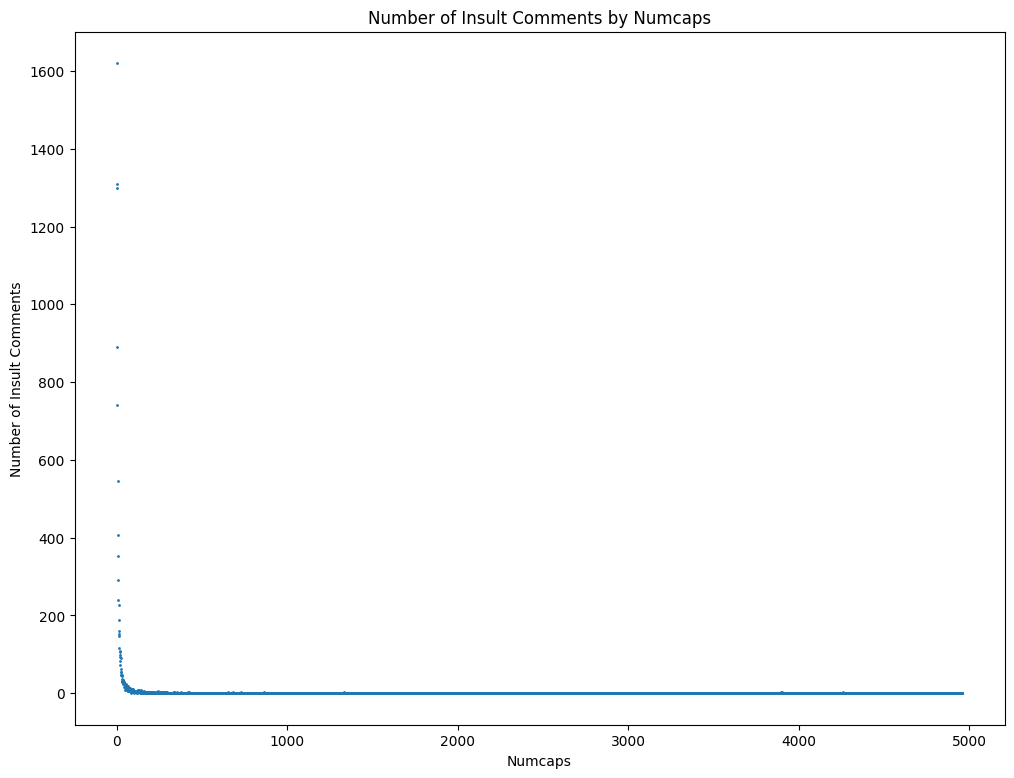

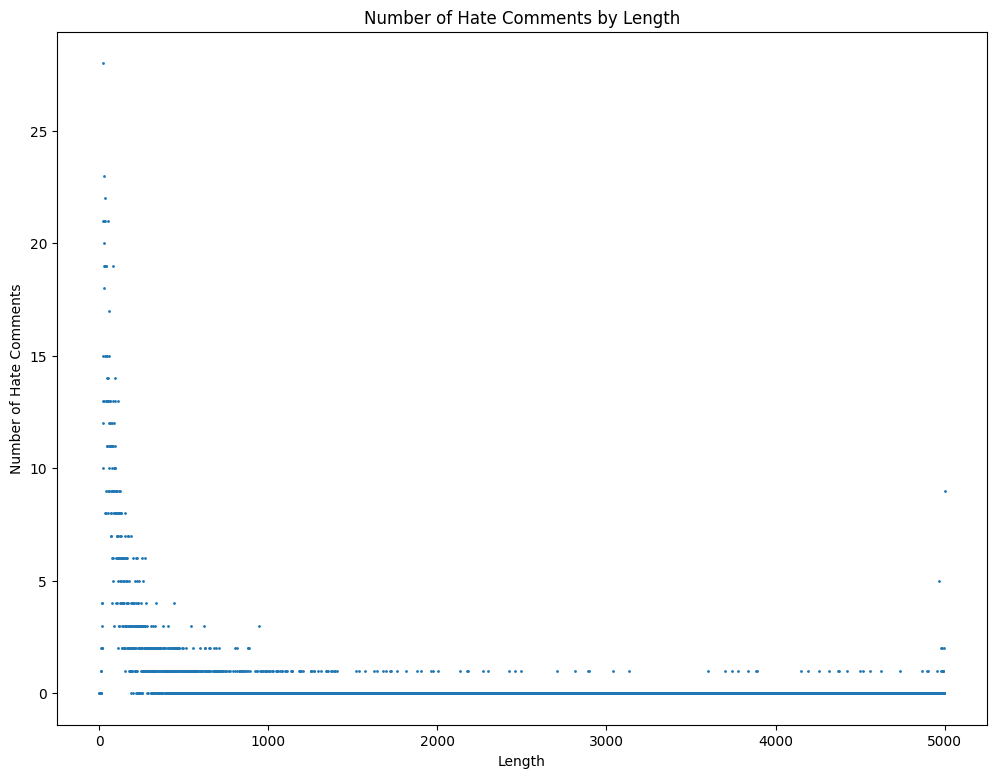

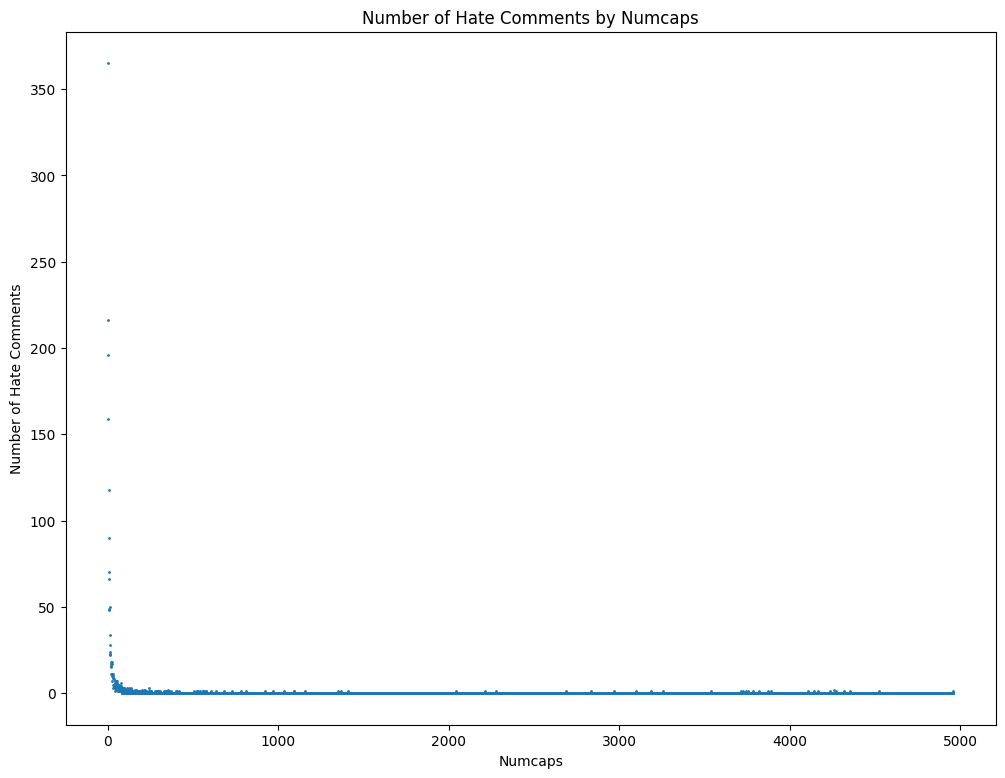

In [32]:
# Now analysis of other parameters based on length
for param in ["vtoxic", "obscene", "threat", "insult", "hate"]:
    for ptype in ["length", "numcaps"]: # ptype stands for parameter type
        max_param = df_en[ptype].max()
        param_counts = [len(df_en[(df_en[param] == 1) & (df_en[ptype] == i)]) for i in range(0, max_param + 1)]
        
        graph=plt
        graph.figure(figsize=(12,9))
        graph.scatter(range(0, max_param + 1), param_counts, s=1)
        graph.xlabel(ptype.title())
        graph.ylabel(f"Number of {param.title()} Comments")
        graph.title(f"Number of {param.title()} Comments by {ptype.title()}") 
        graph.savefig(f"Analysis Graphs/{param}/{ptype}.png")
        graph.show()

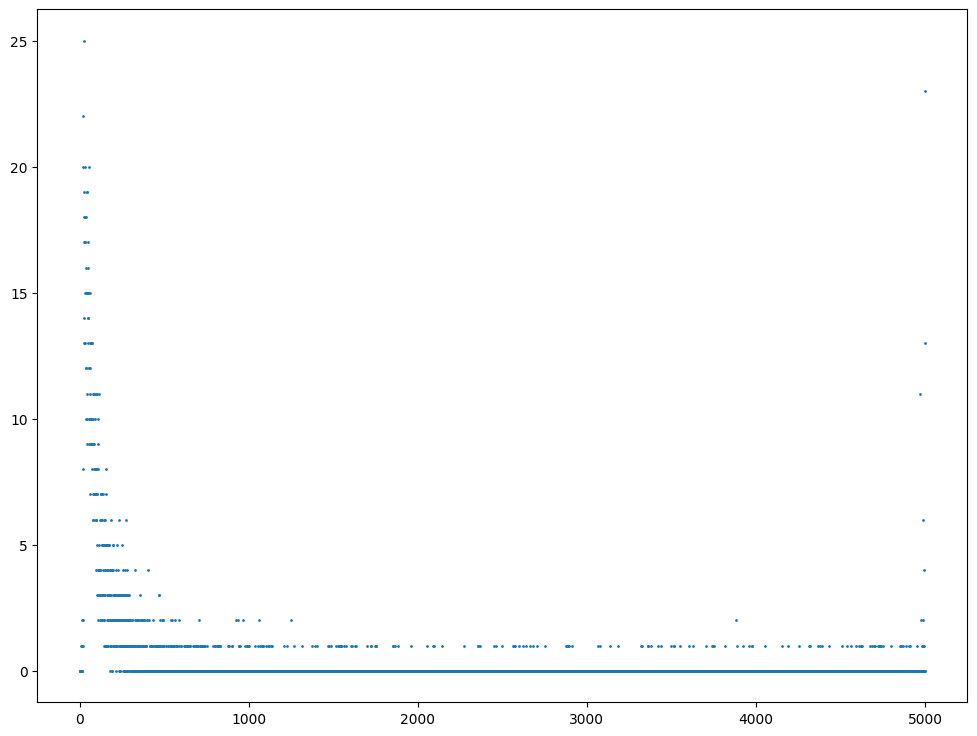

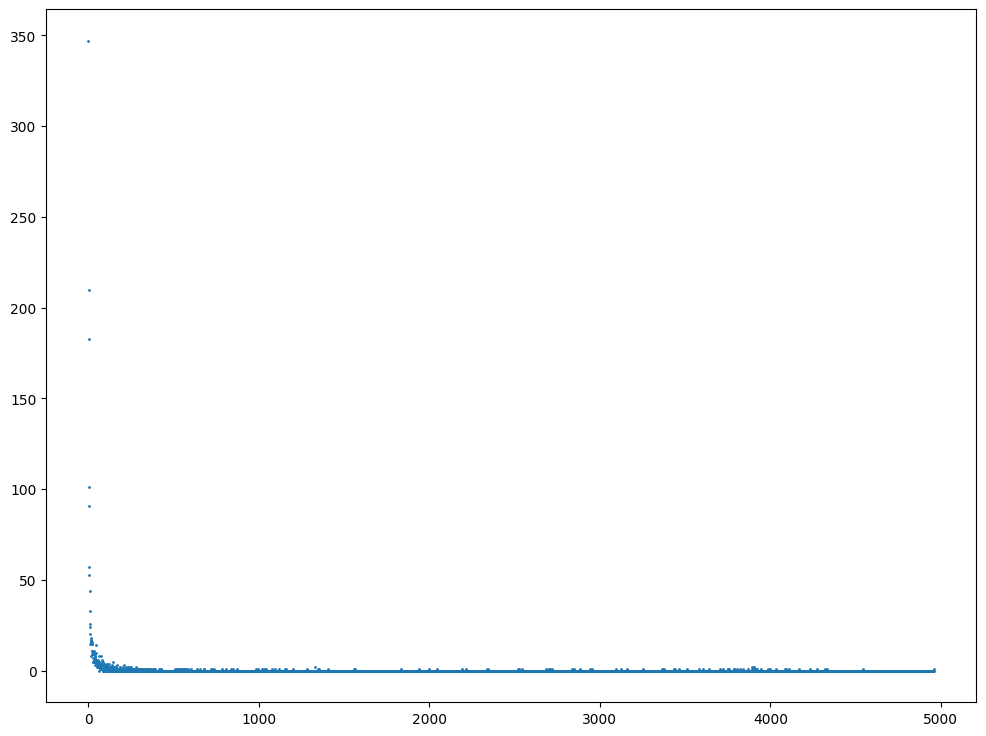

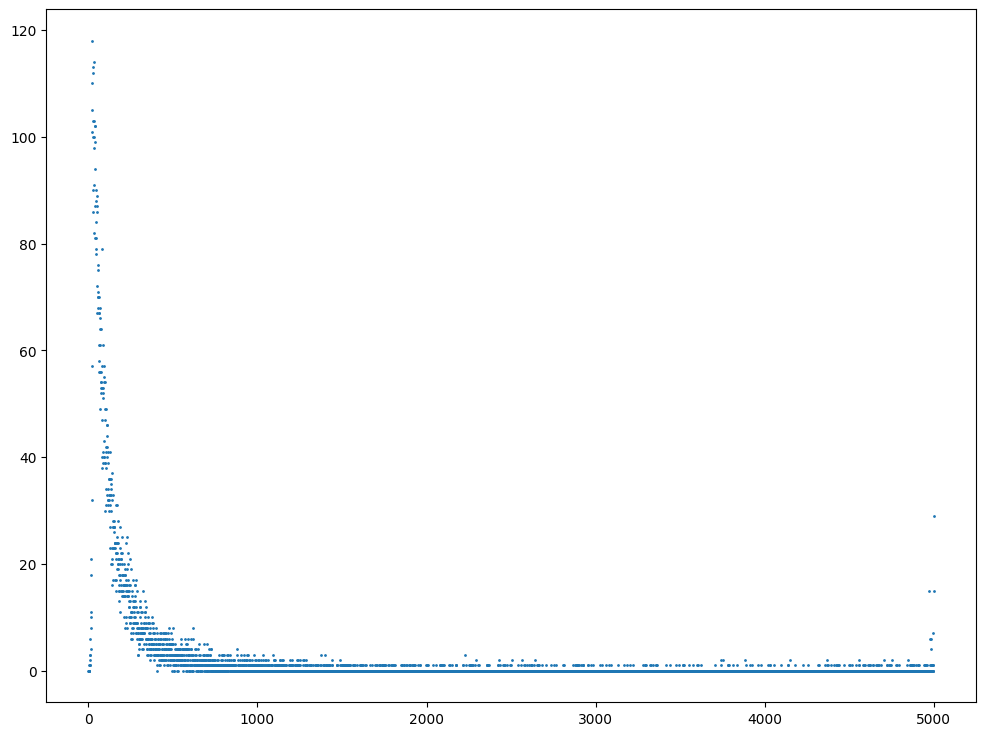

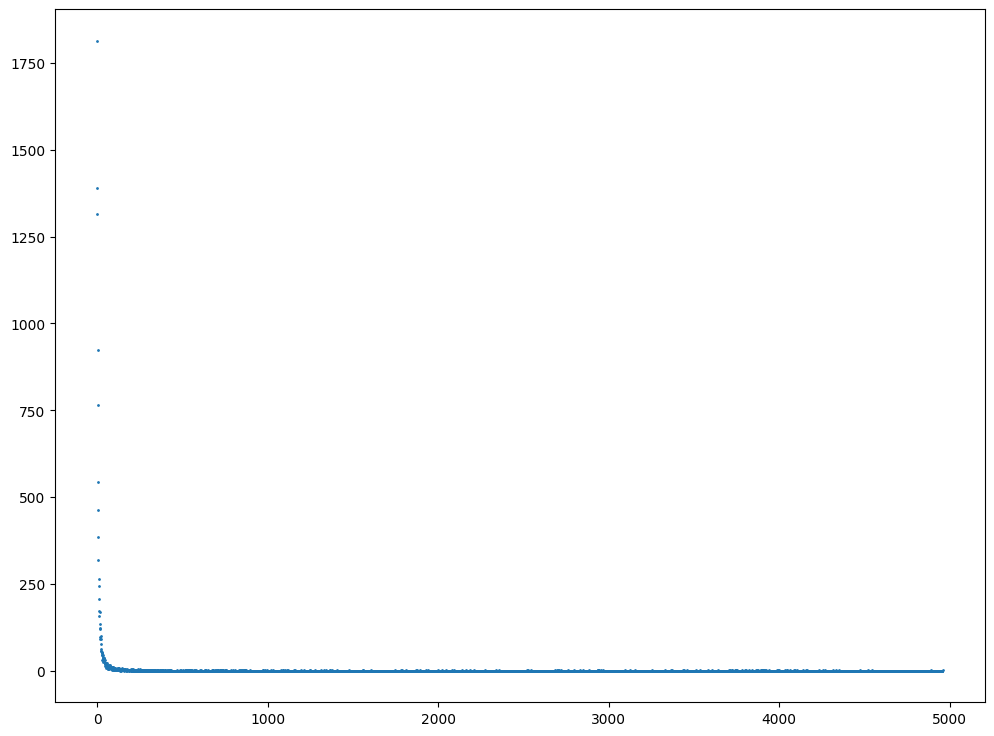

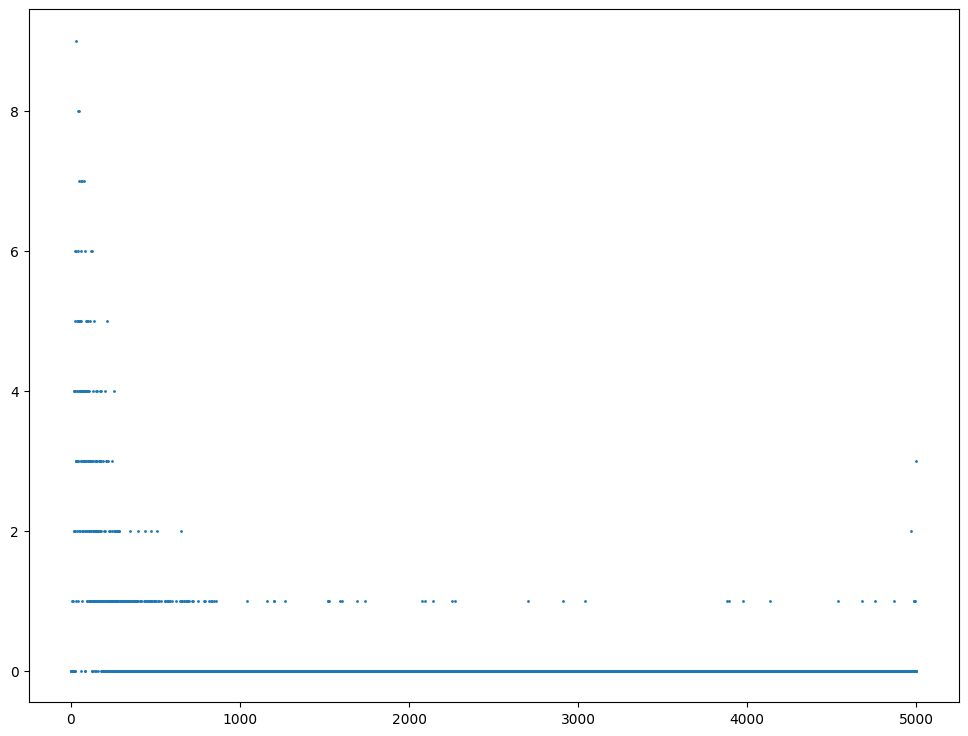

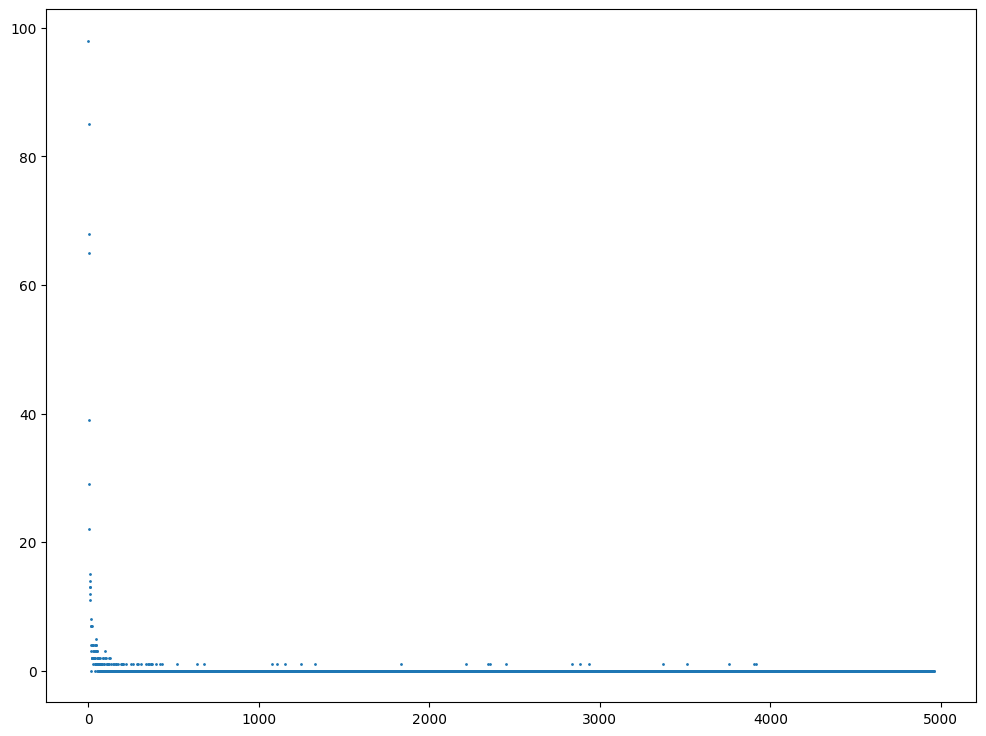

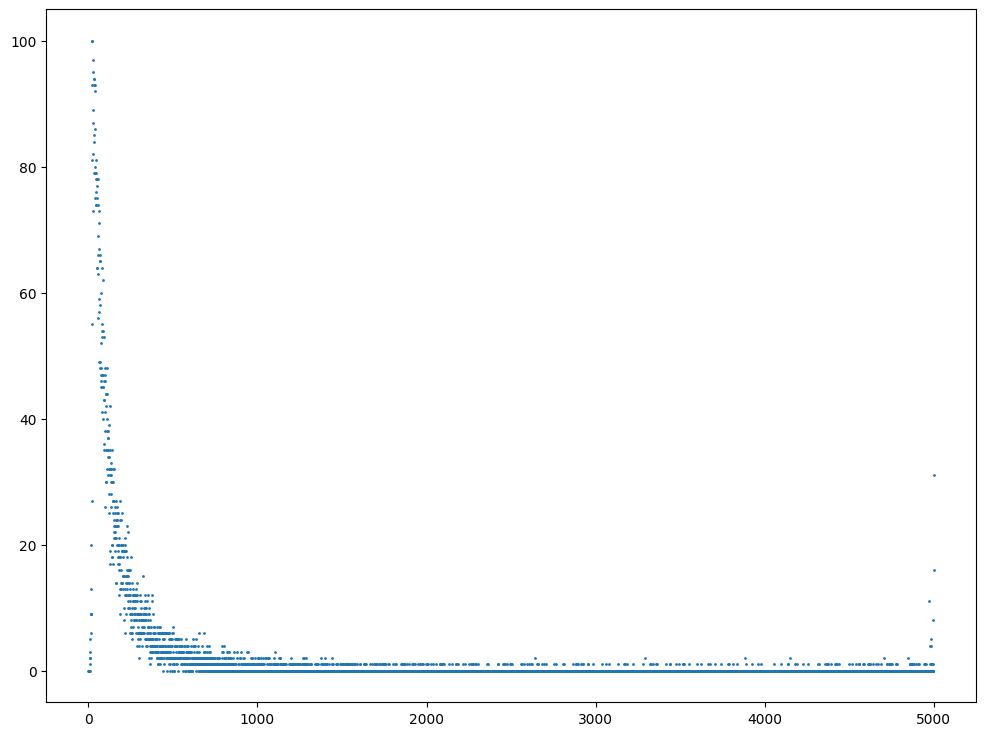

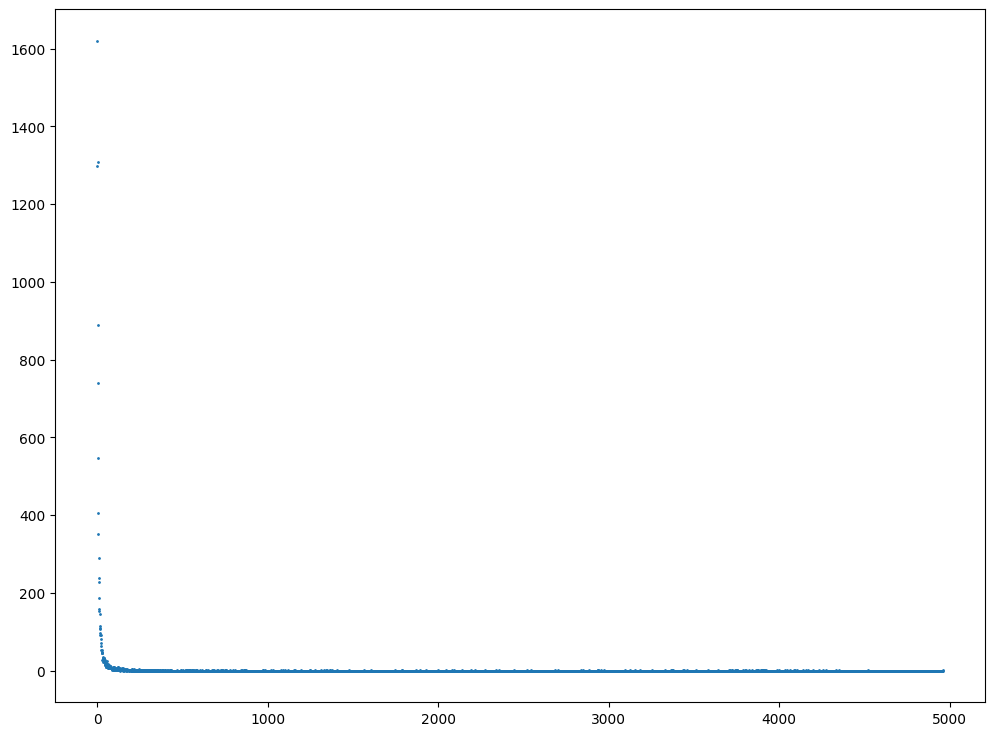

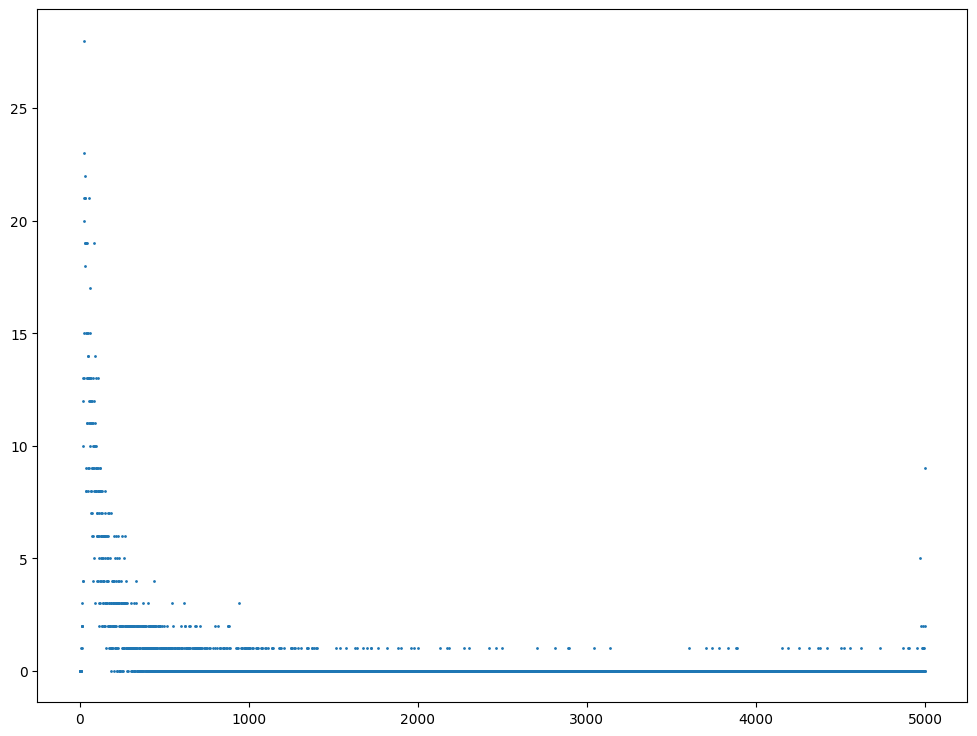

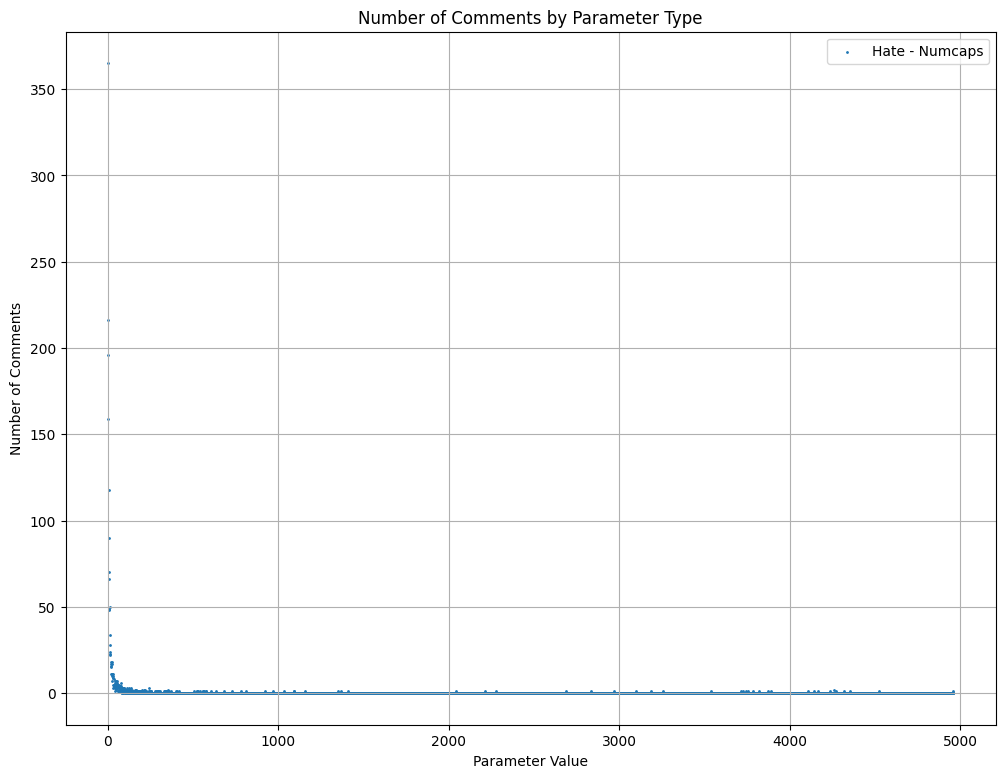

In [33]:
graph=plt
for param in ["vtoxic", "obscene", "threat", "insult", "hate"]:
    for ptype in ["length", "numcaps"]:
        max_param = df_en[ptype].max()
        param_counts = [len(df_en[(df_en[param] == 1) & (df_en[ptype] == i)]) for i in range(0, max_param + 1)]
        
        graph.figure(figsize=(12,9))
        graph.scatter(range(0, max_param + 1), param_counts, label=f"{param.title()} - {ptype.title()}", s=1)

graph.xlabel("Parameter Value")
graph.ylabel("Number of Comments")
graph.title("Number of Comments by Parameter Type")
graph.legend()
graph.grid(True)
graph.savefig("Analysis Graphs/all_params.png")
graph.show()

<Figure size 1200x800 with 0 Axes>

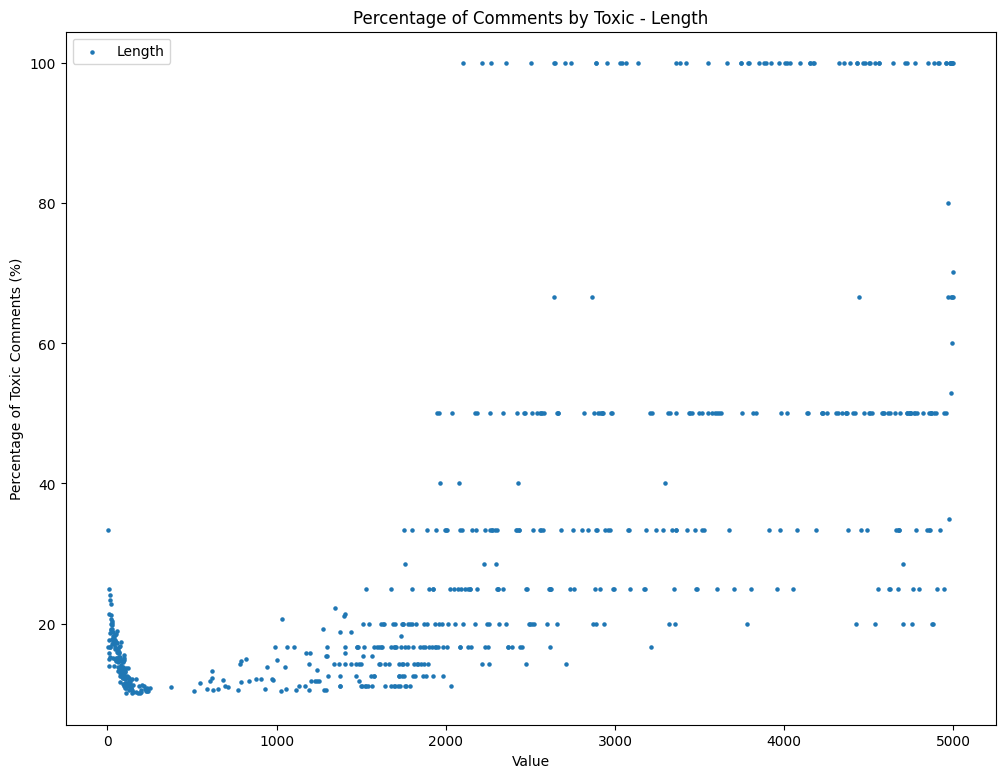

<Figure size 1200x800 with 0 Axes>

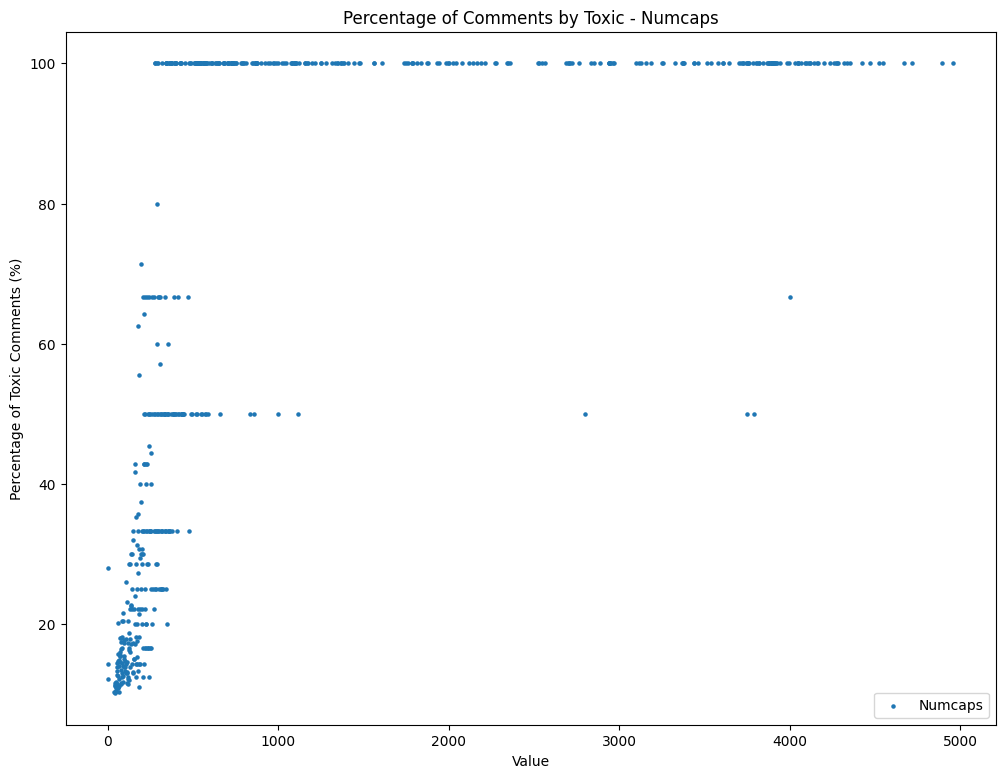

<Figure size 1200x800 with 0 Axes>

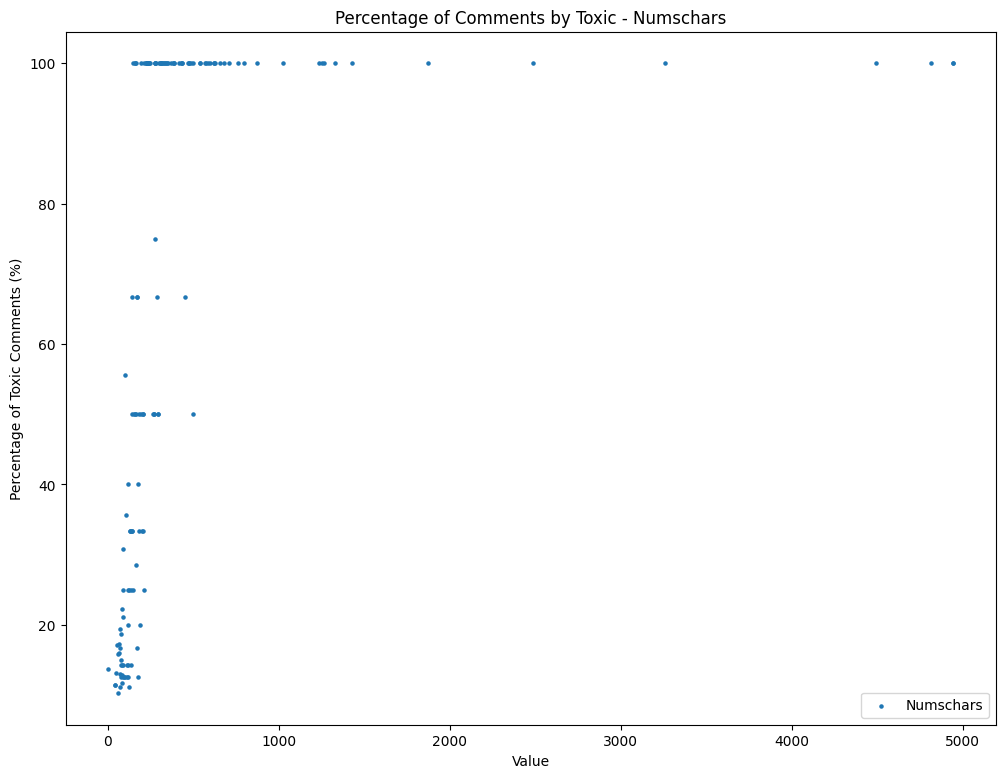

<Figure size 1200x800 with 0 Axes>

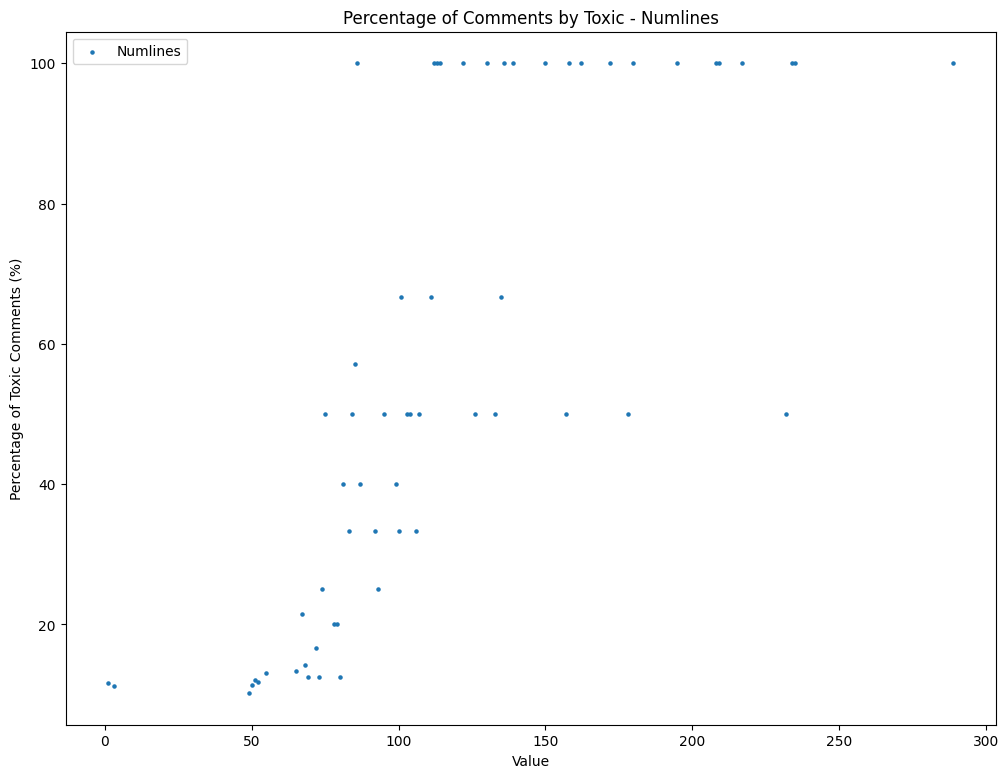

<Figure size 1200x800 with 0 Axes>

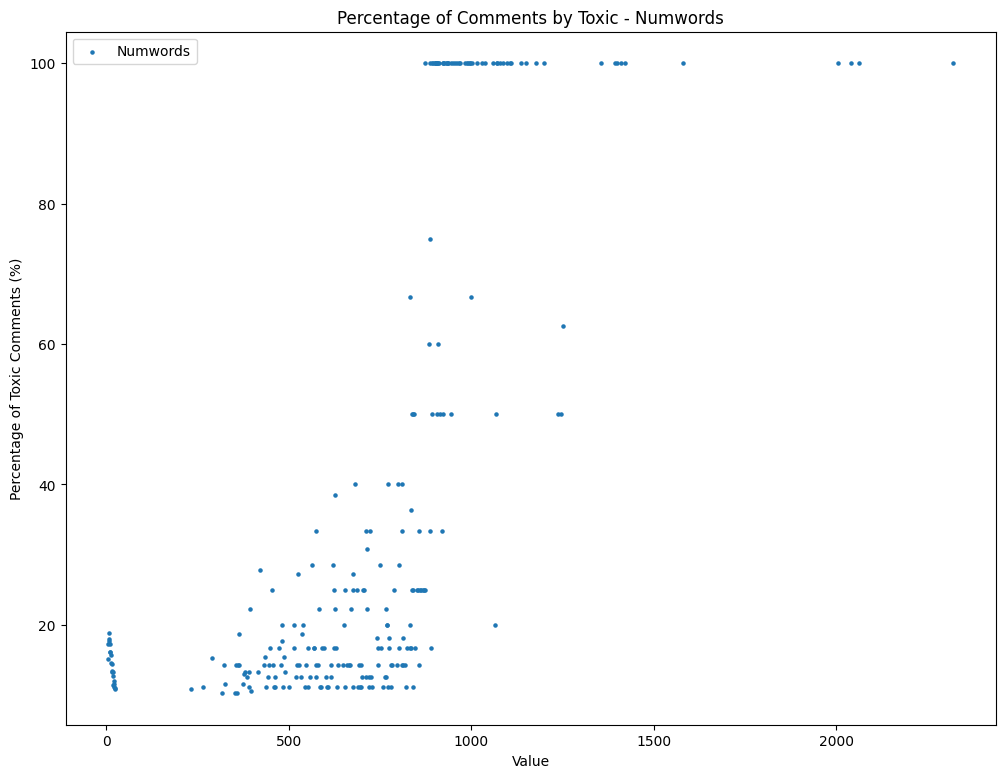

<Figure size 1200x800 with 0 Axes>

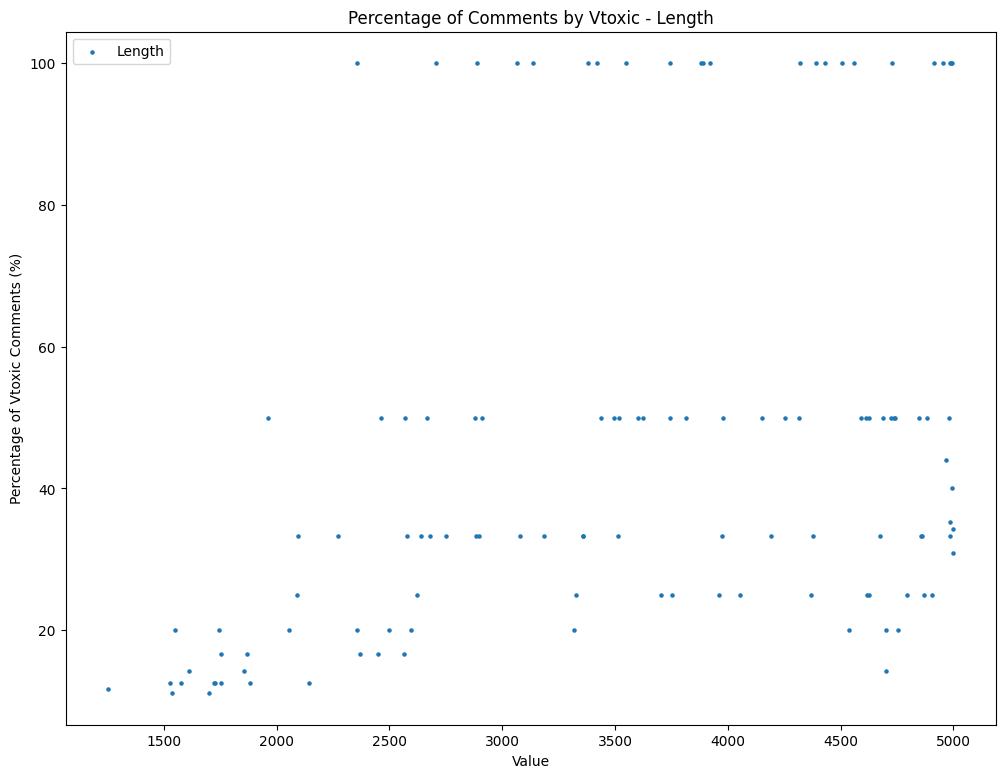

<Figure size 1200x800 with 0 Axes>

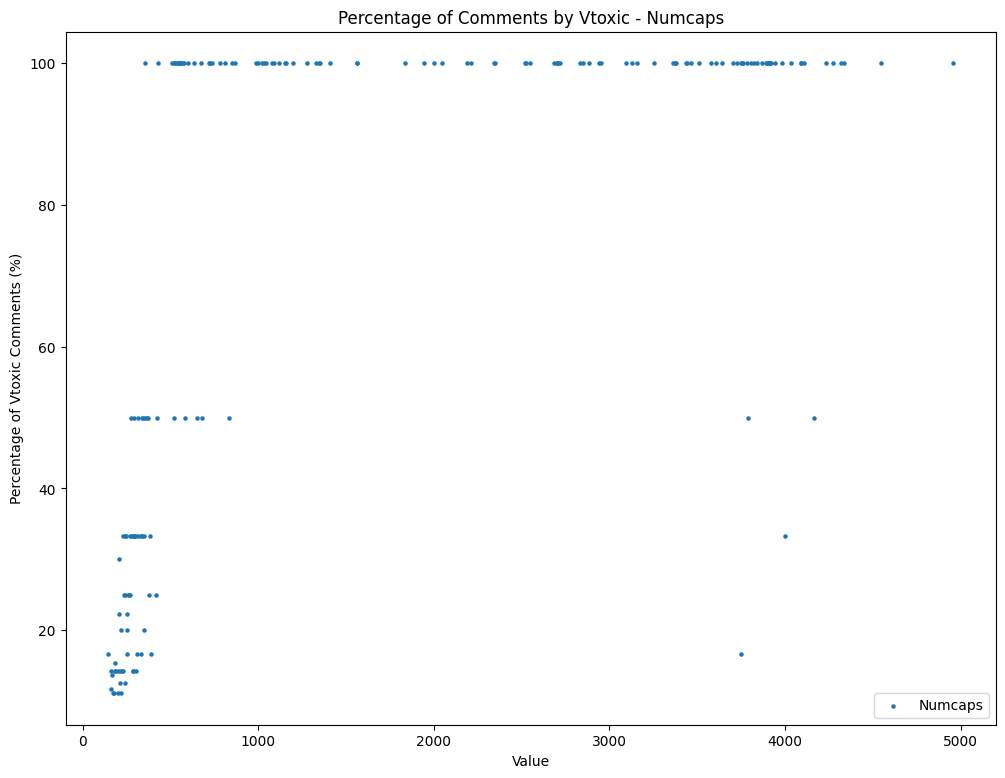

<Figure size 1200x800 with 0 Axes>

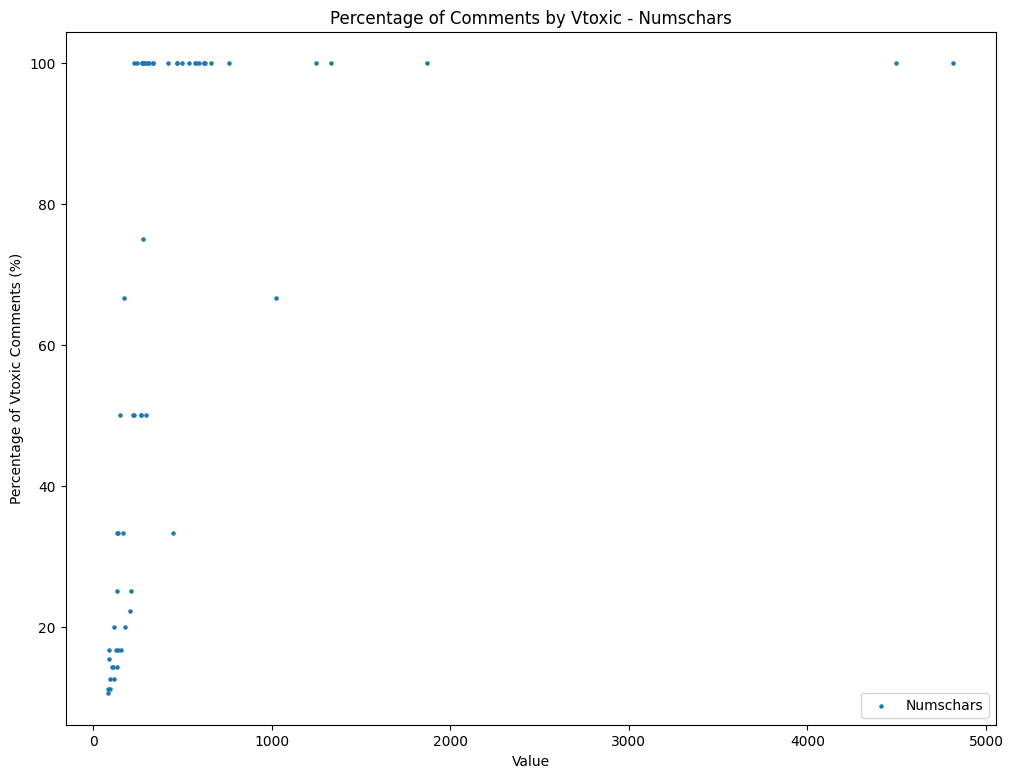

<Figure size 1200x800 with 0 Axes>

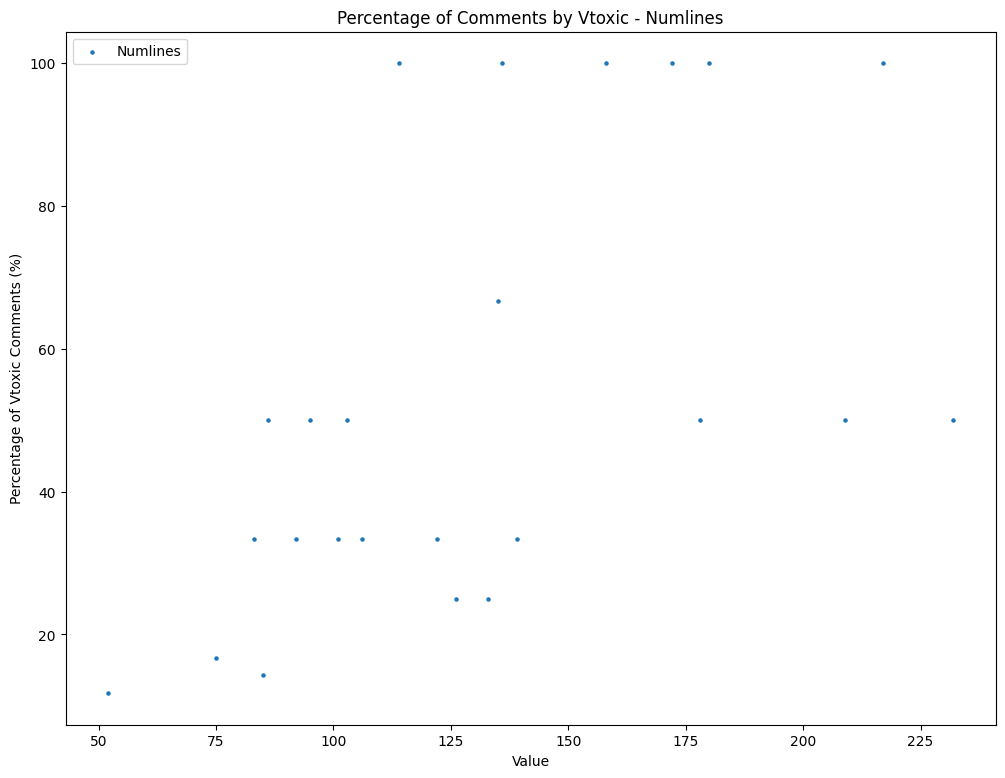

<Figure size 1200x800 with 0 Axes>

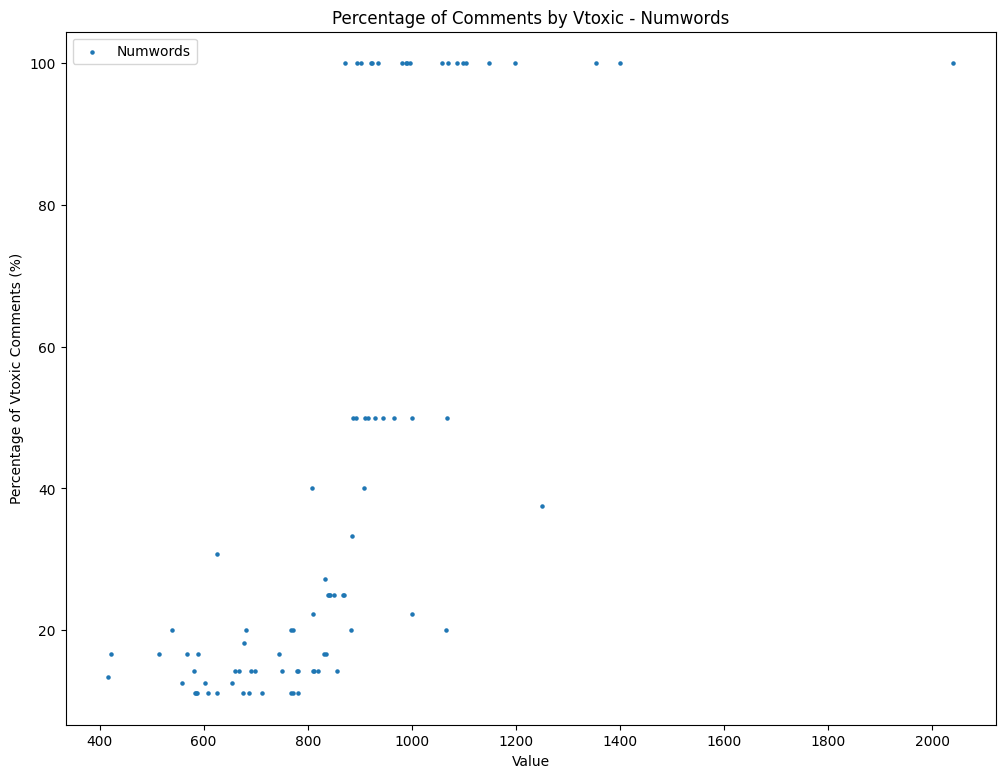

<Figure size 1200x800 with 0 Axes>

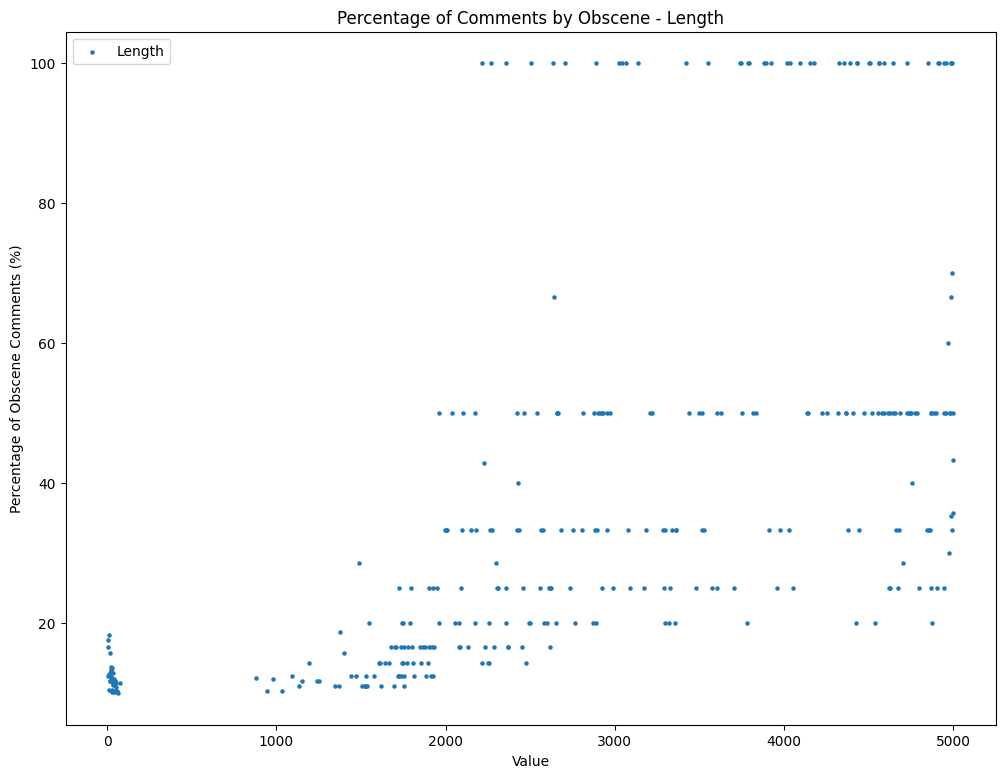

<Figure size 1200x800 with 0 Axes>

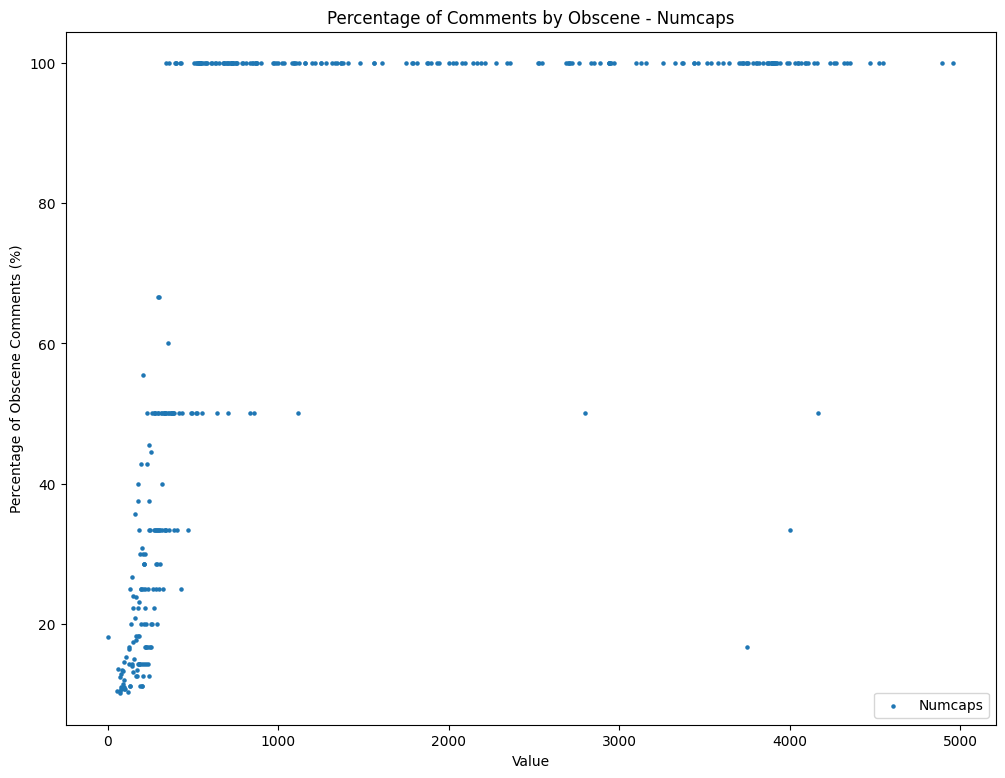

<Figure size 1200x800 with 0 Axes>

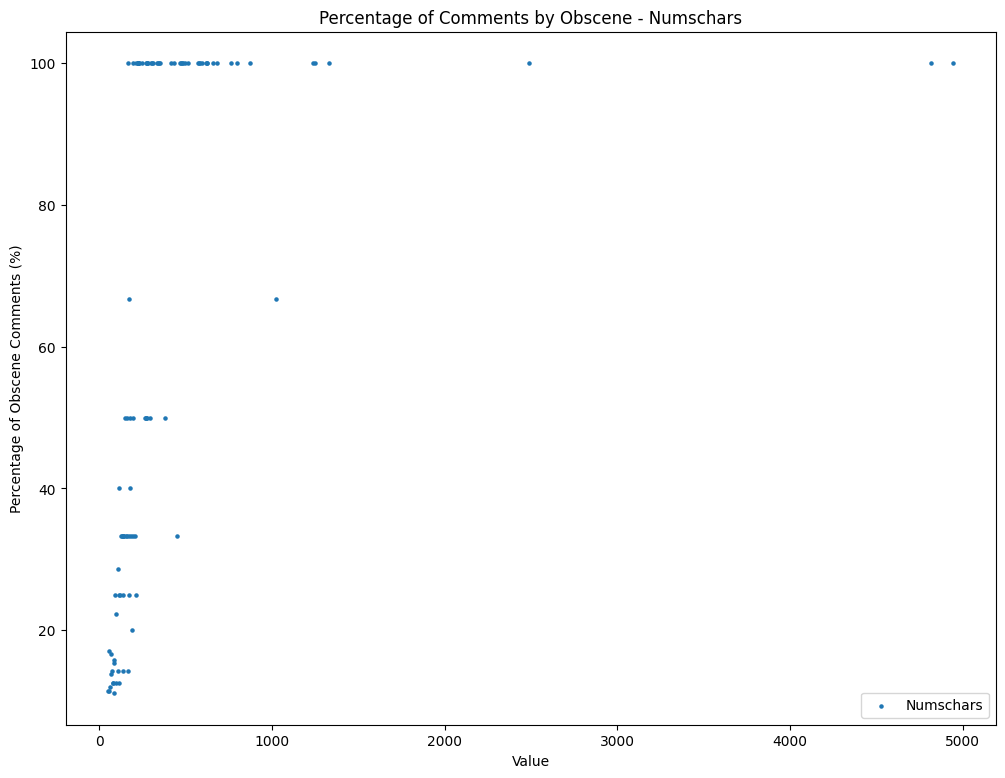

<Figure size 1200x800 with 0 Axes>

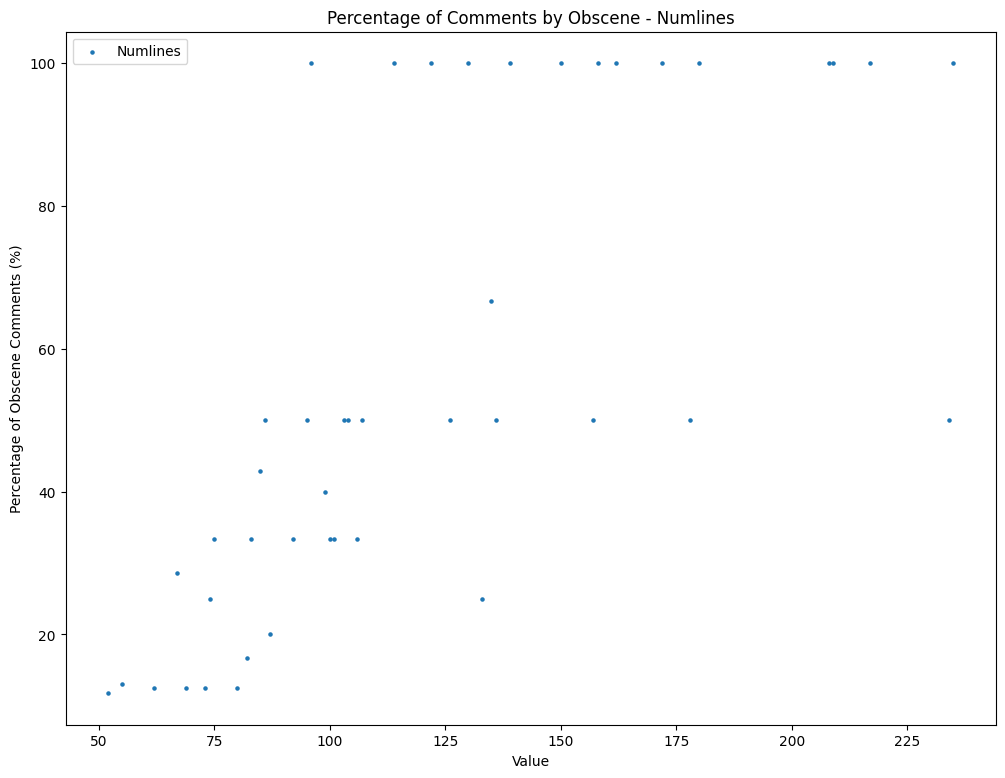

<Figure size 1200x800 with 0 Axes>

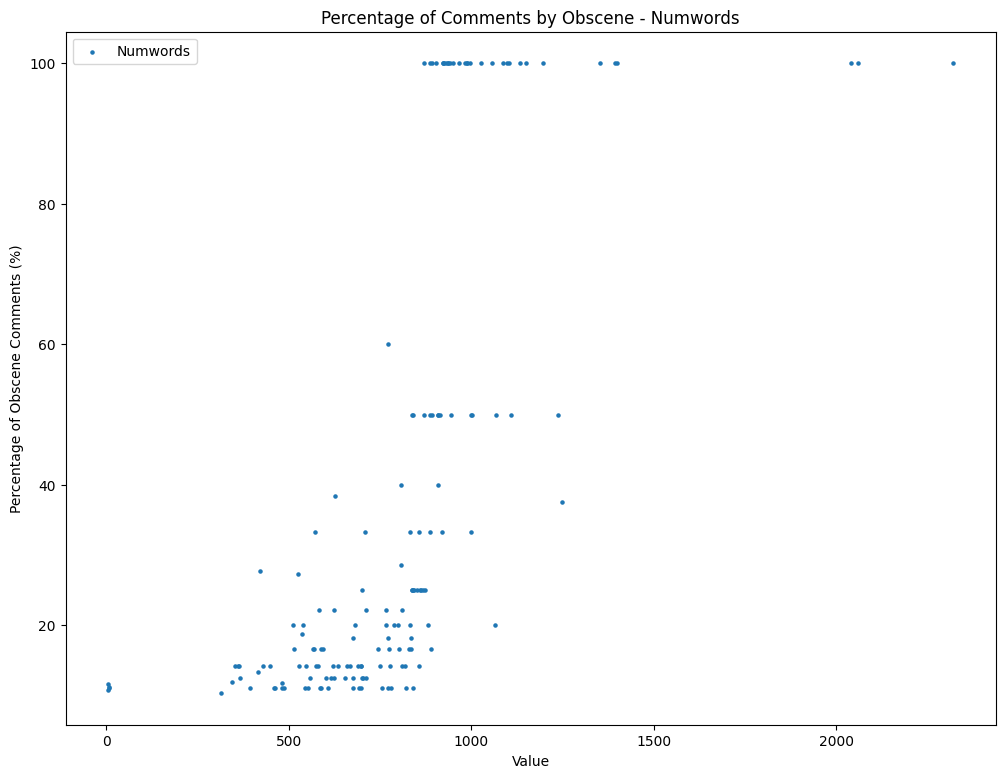

<Figure size 1200x800 with 0 Axes>

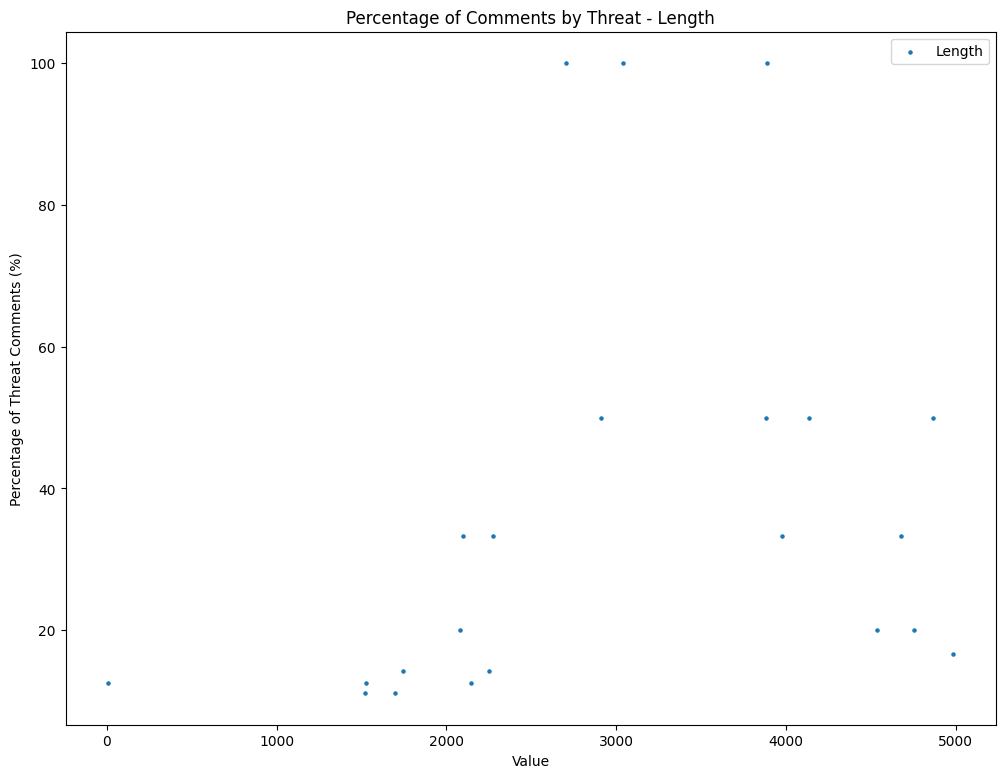

<Figure size 1200x800 with 0 Axes>

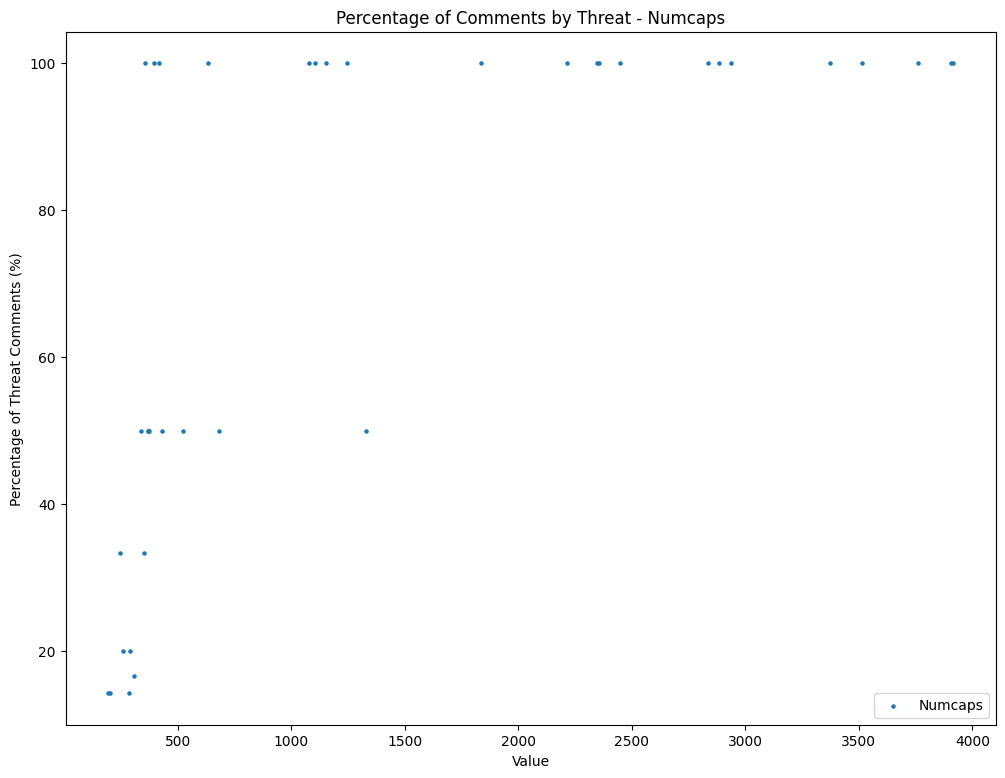

<Figure size 1200x800 with 0 Axes>

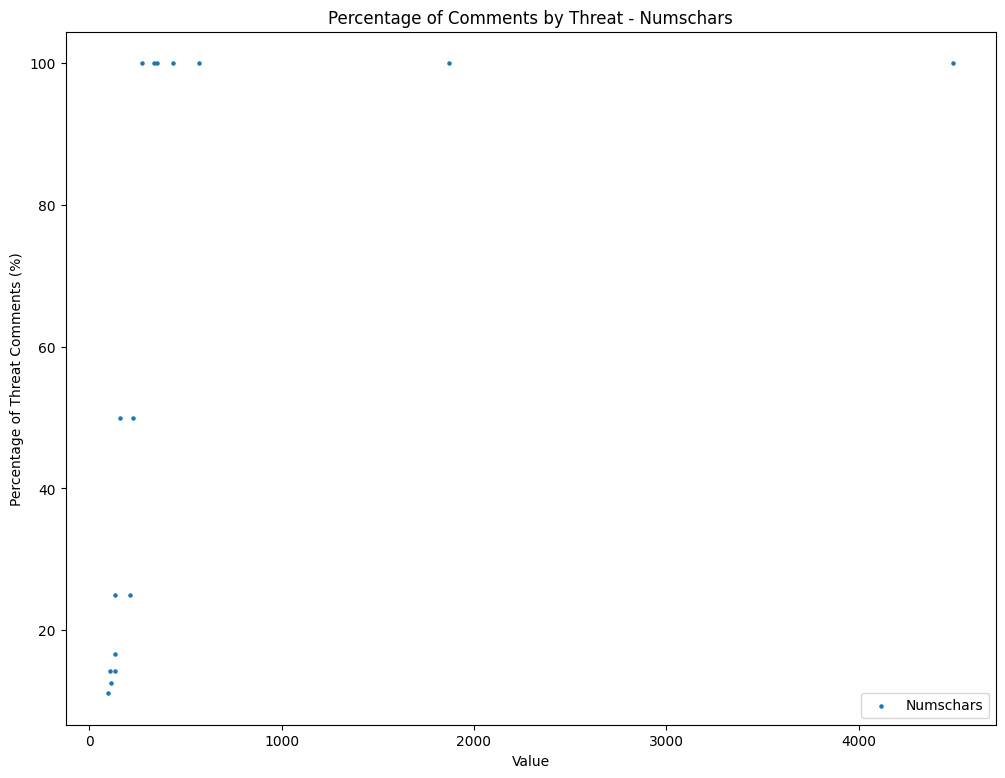

<Figure size 1200x800 with 0 Axes>

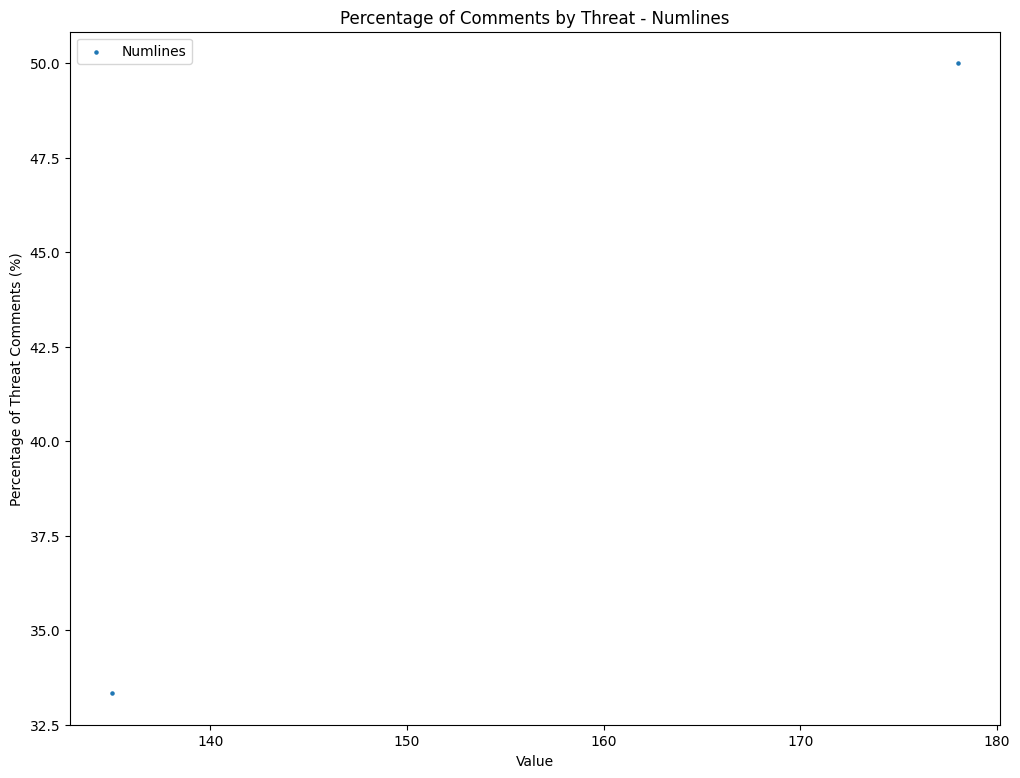

<Figure size 1200x800 with 0 Axes>

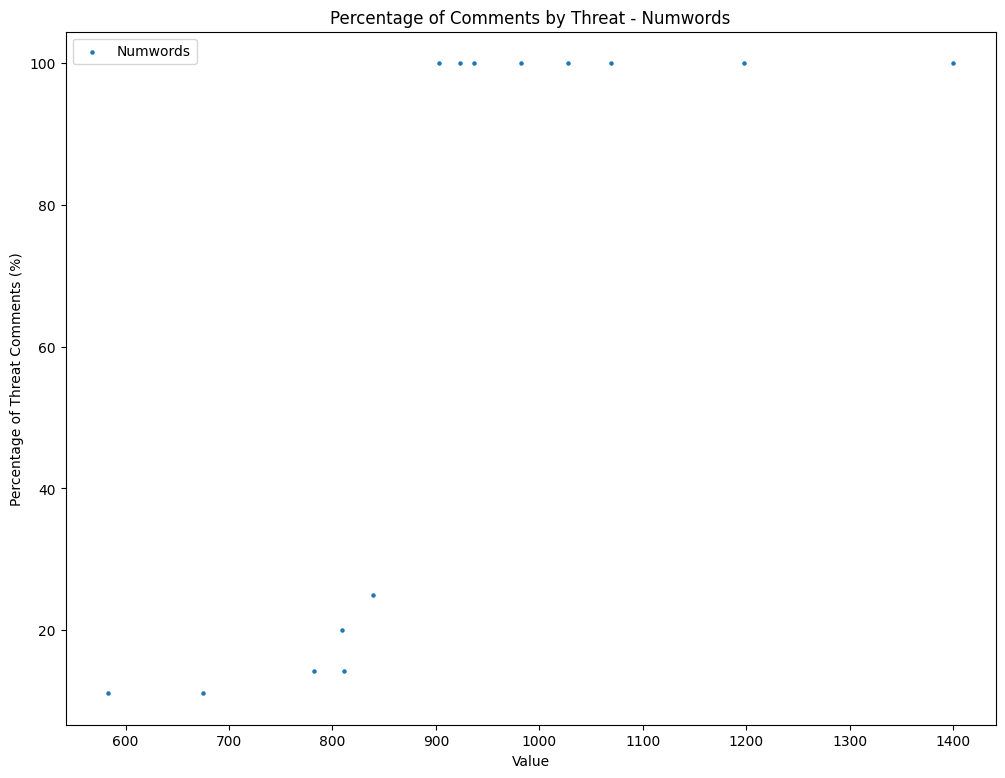

<Figure size 1200x800 with 0 Axes>

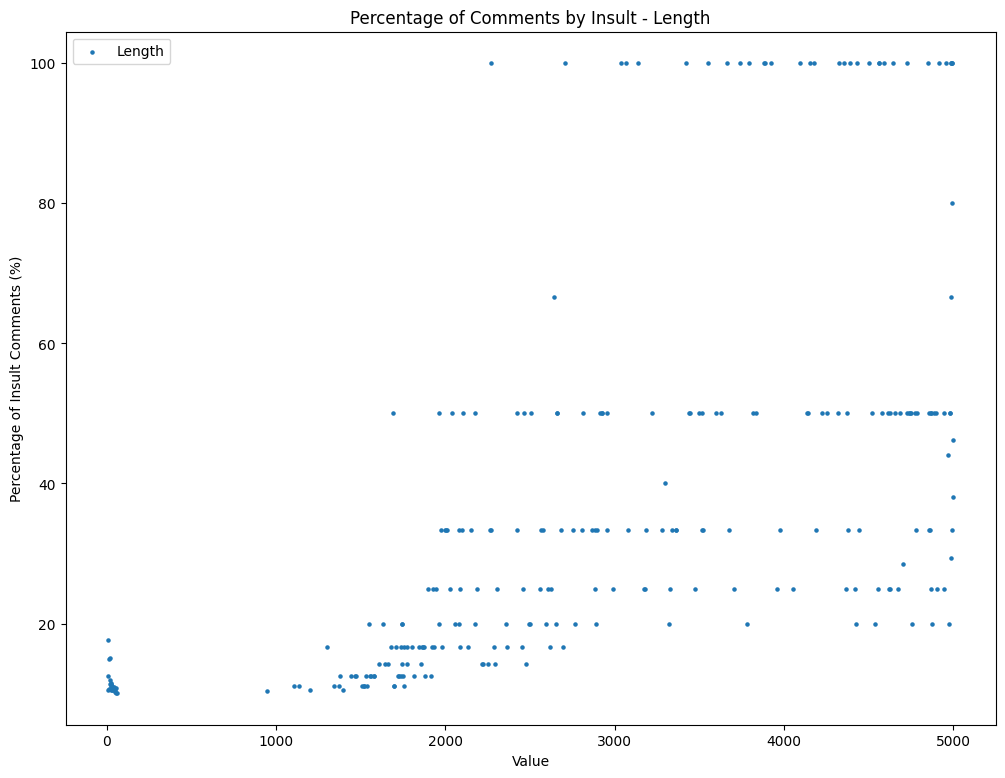

<Figure size 1200x800 with 0 Axes>

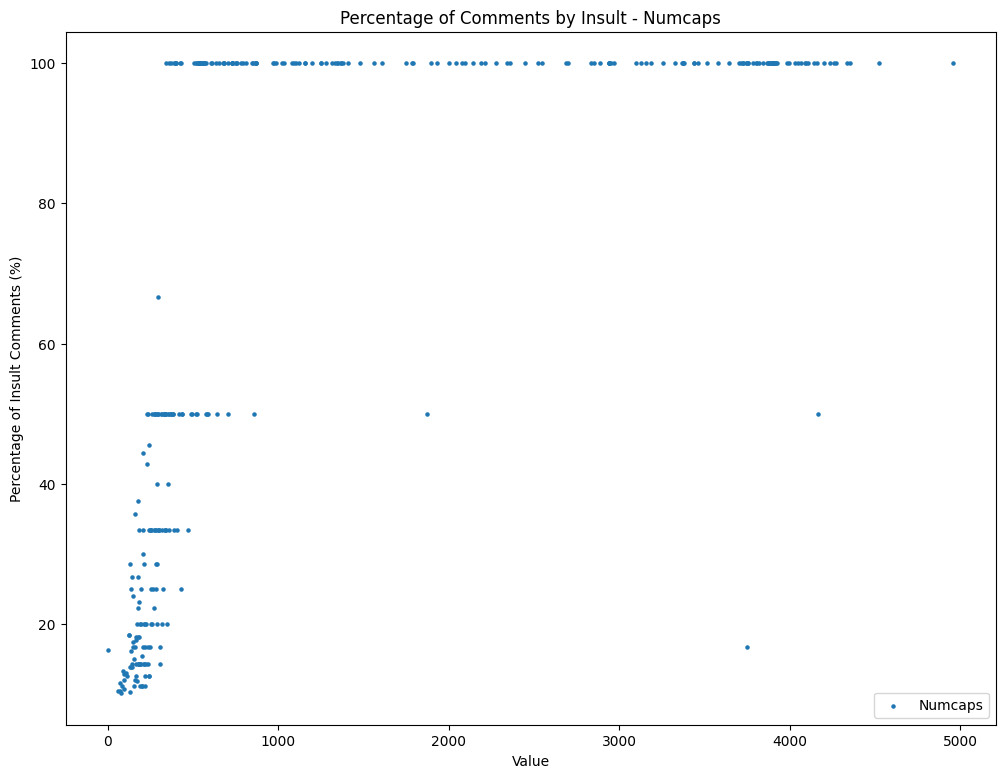

<Figure size 1200x800 with 0 Axes>

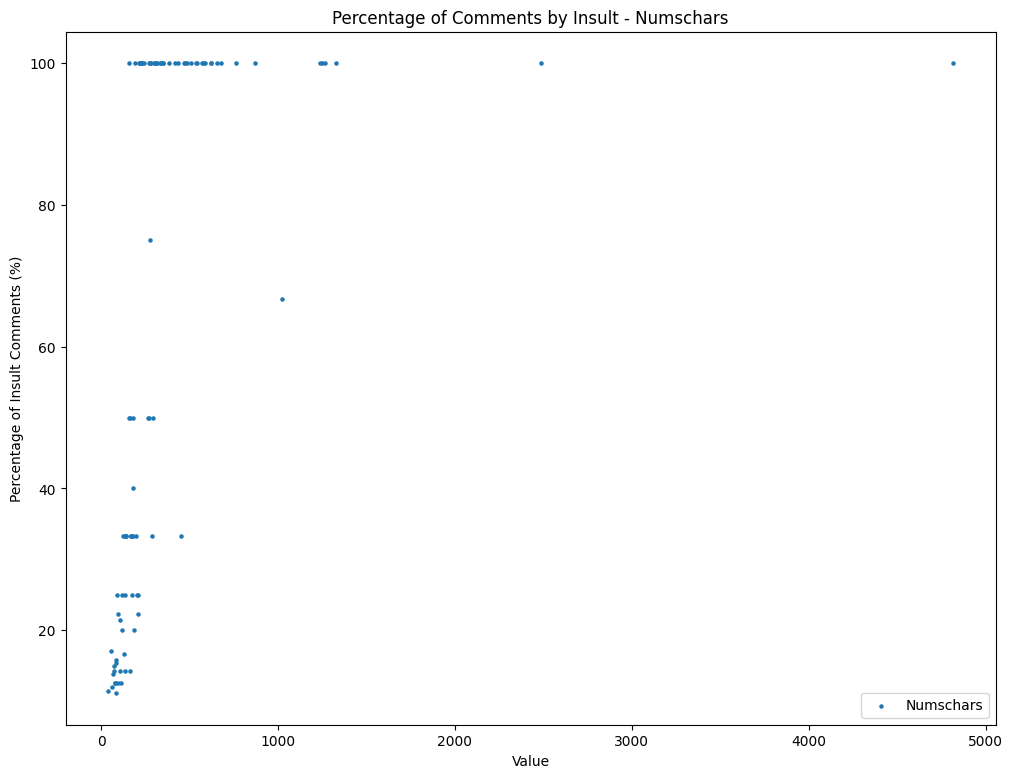

<Figure size 1200x800 with 0 Axes>

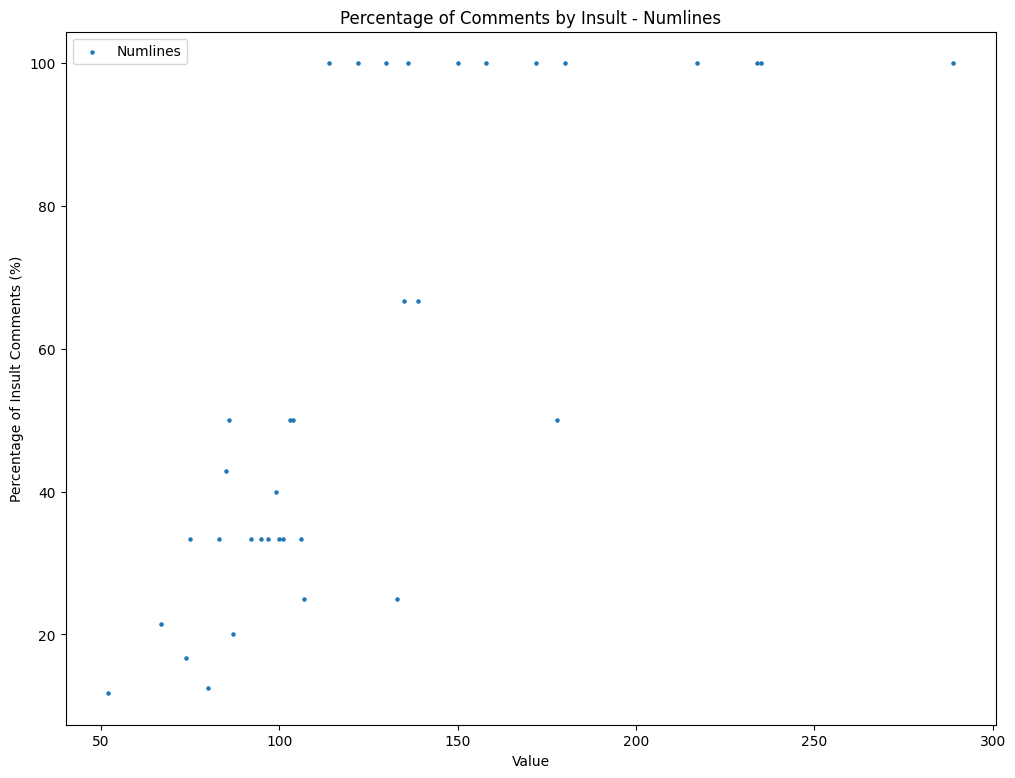

<Figure size 1200x800 with 0 Axes>

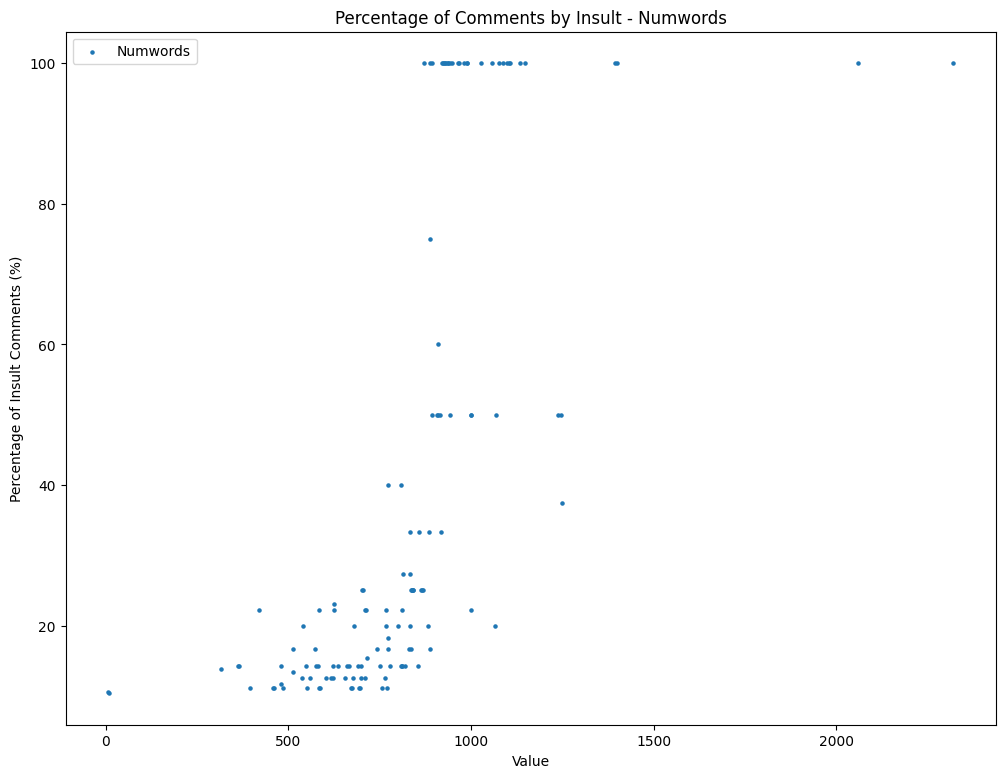

<Figure size 1200x800 with 0 Axes>

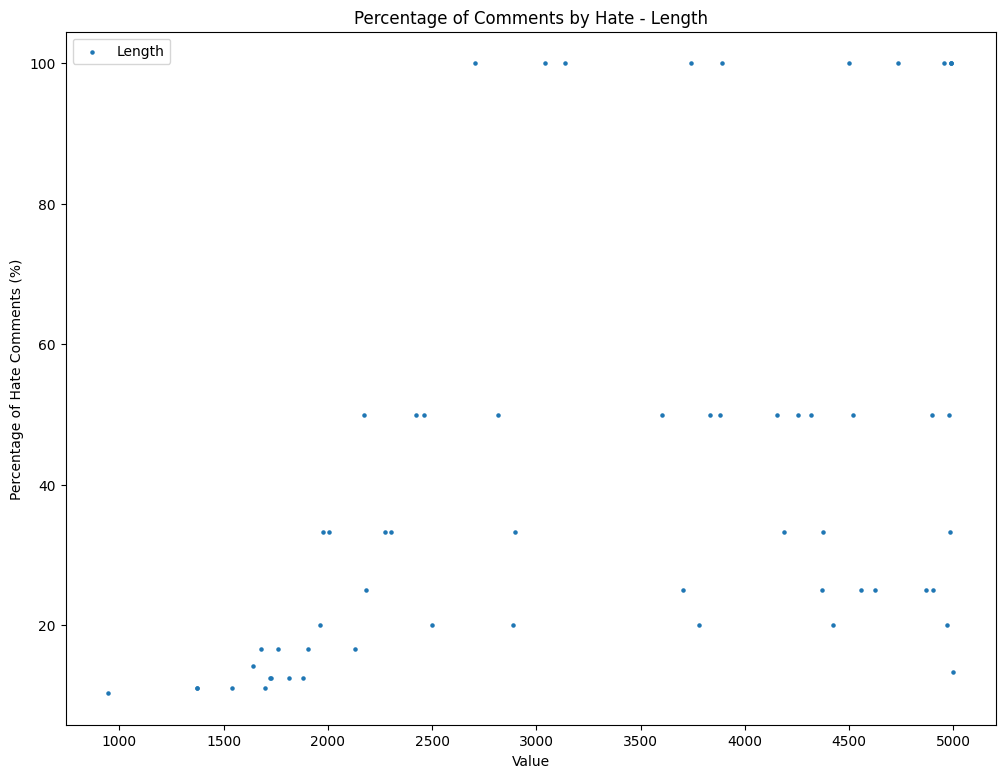

<Figure size 1200x800 with 0 Axes>

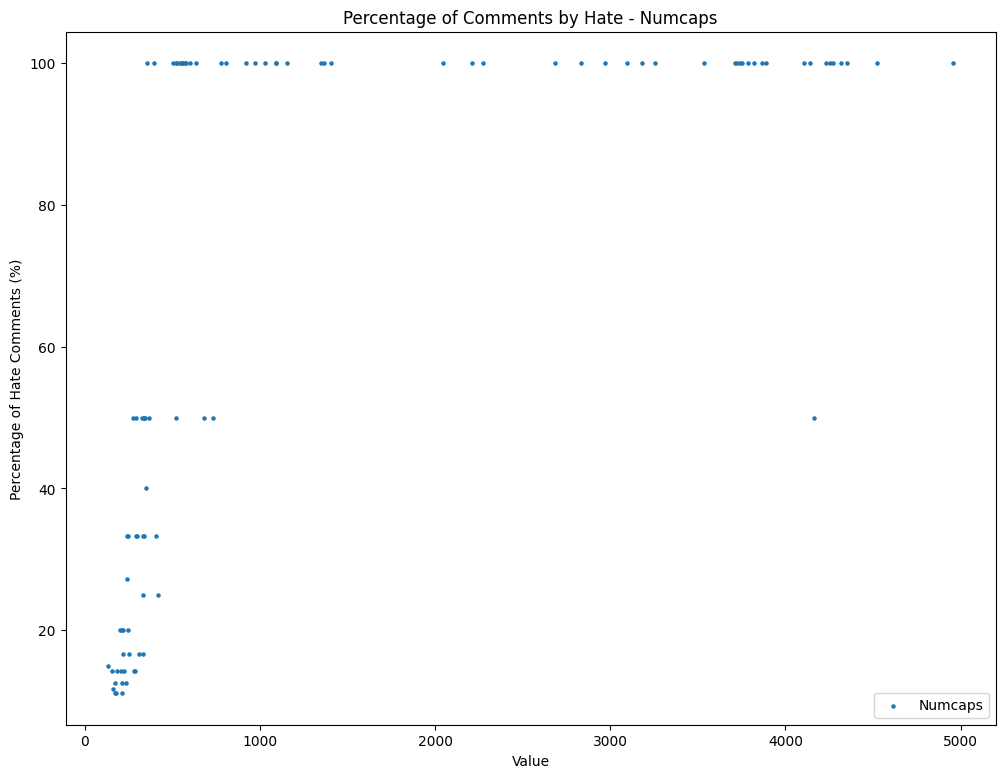

<Figure size 1200x800 with 0 Axes>

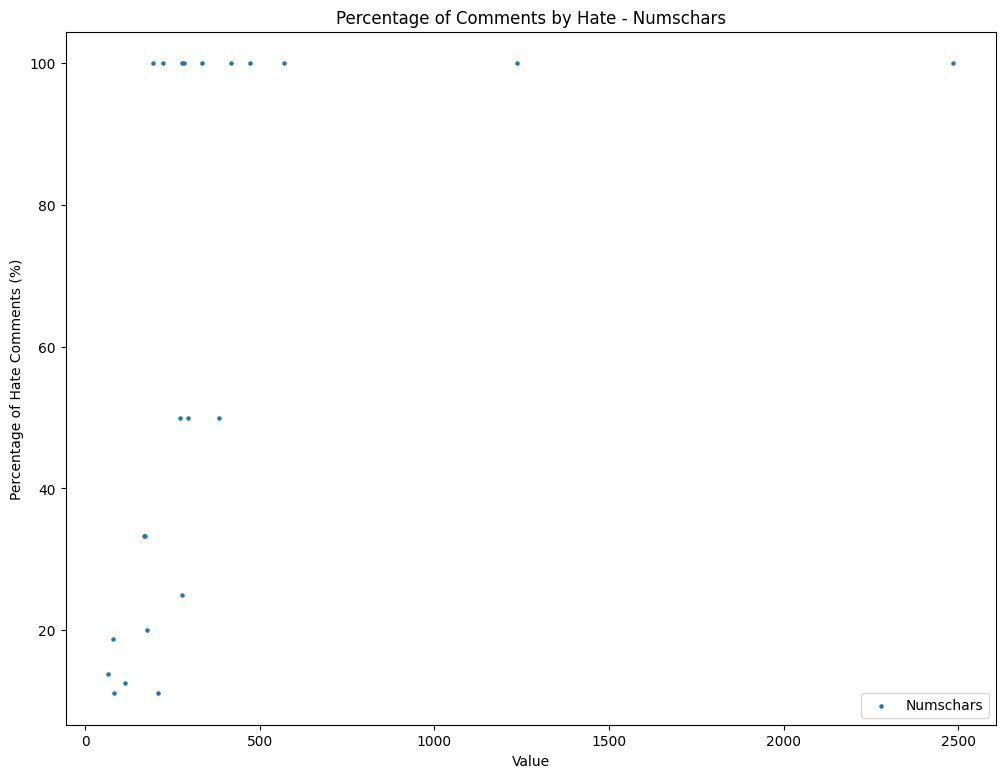

<Figure size 1200x800 with 0 Axes>

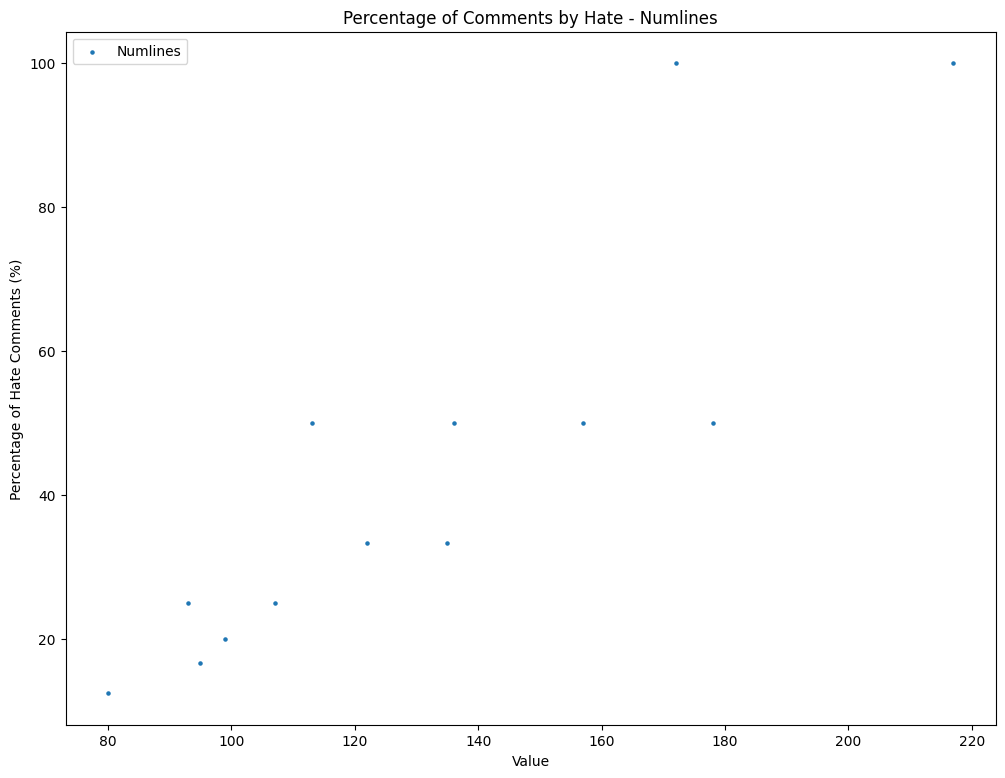

<Figure size 1200x800 with 0 Axes>

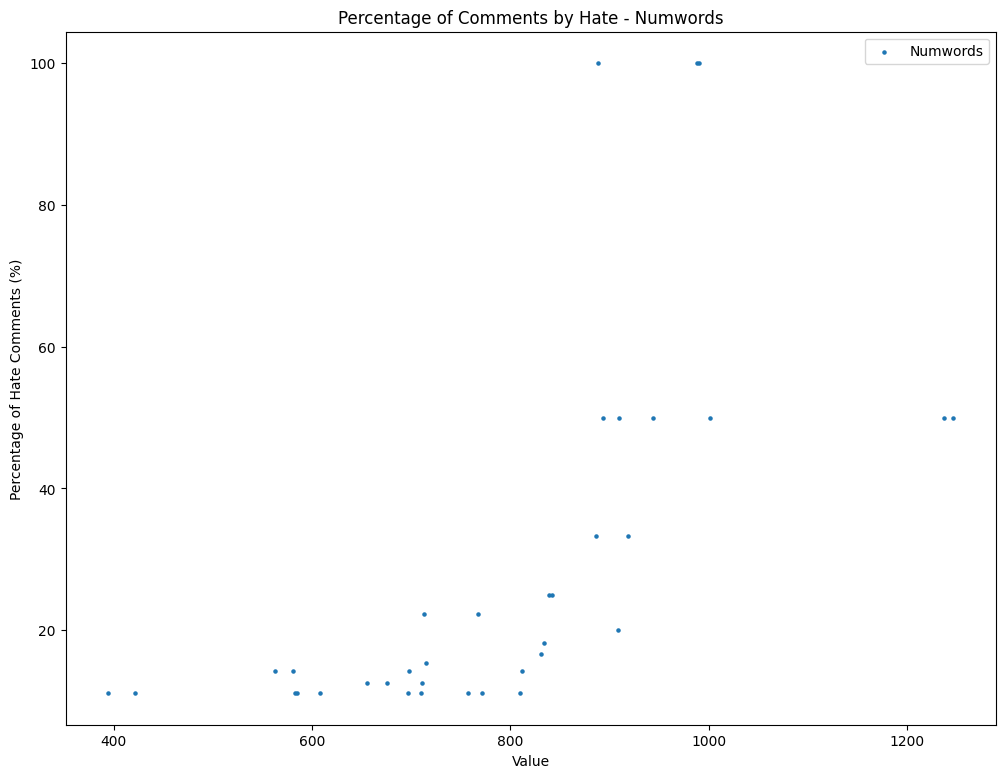

In [39]:

# List of features to analyze
features = ["length", "numcaps", "numschars", "numlines", "numwords"] #, "numemojis"]
params = ["toxic", "vtoxic", "obscene", "threat", "insult", "hate"]

for param in params:
    for feature in features:
        graph = plt.figure(figsize=(12, 8))  # Adjust figure size as needed

        param_counts = []
        x_values = []

        # Calculate the maximum value for the current feature
        max_value = df_en[feature].max()

        for i in range(0, max_value + 1):
            # Total comments of this feature value
            total_count = len(df_en[df_en[feature] == i])  
            # Param comments of this feature value
            param_count = len(df_en[(df_en[param] == 1) & (df_en[feature] == i)])  
            
            # Calculate percentage if total_count > 0
            if total_count > 0 and param_count > total_count * 0.1:
                percentage = (param_count / total_count) * 100
                param_counts.append(percentage)
                x_values.append(i)  # Only include x value if valid

        # Plot the feature for the current parameter
        graph = plt
        graph.figure(figsize=(12,9))
        graph.scatter(x_values, param_counts, label=f"{feature.title()}", s=5)

        graph.xlabel("Value")
        graph.ylabel(f"Percentage of {param.title()} Comments (%)")
        graph.title(f"Percentage of Comments by {param.title()} - {feature.title()}")
        graph.legend()
        graph.savefig(f"Analysis Graphs/{param.title()}_{feature.title()}.png")
        graph.show()

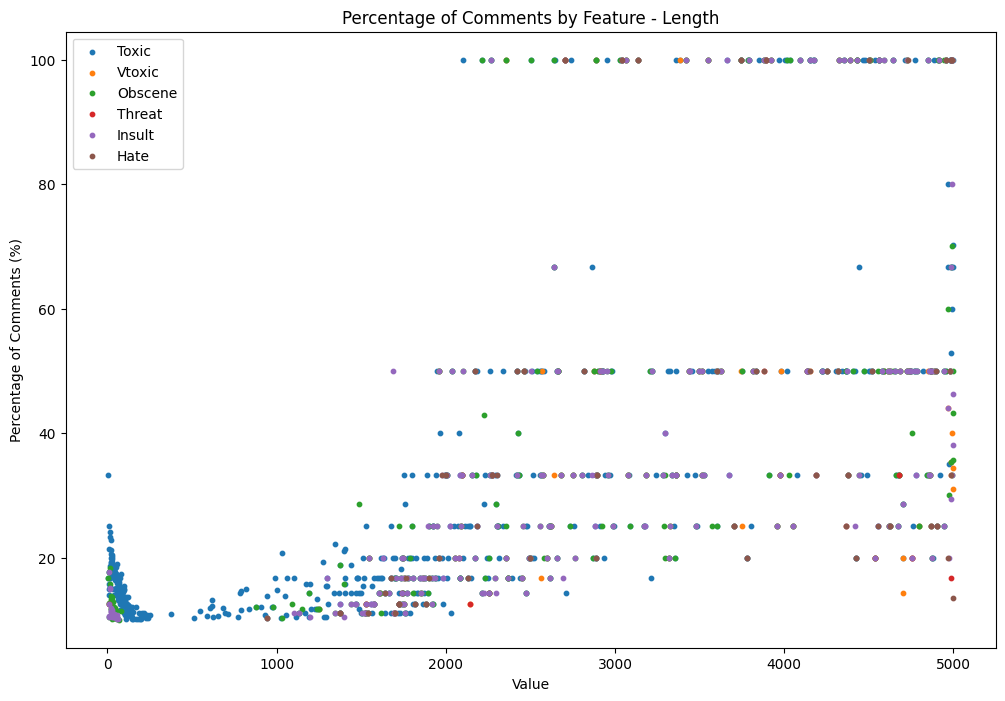

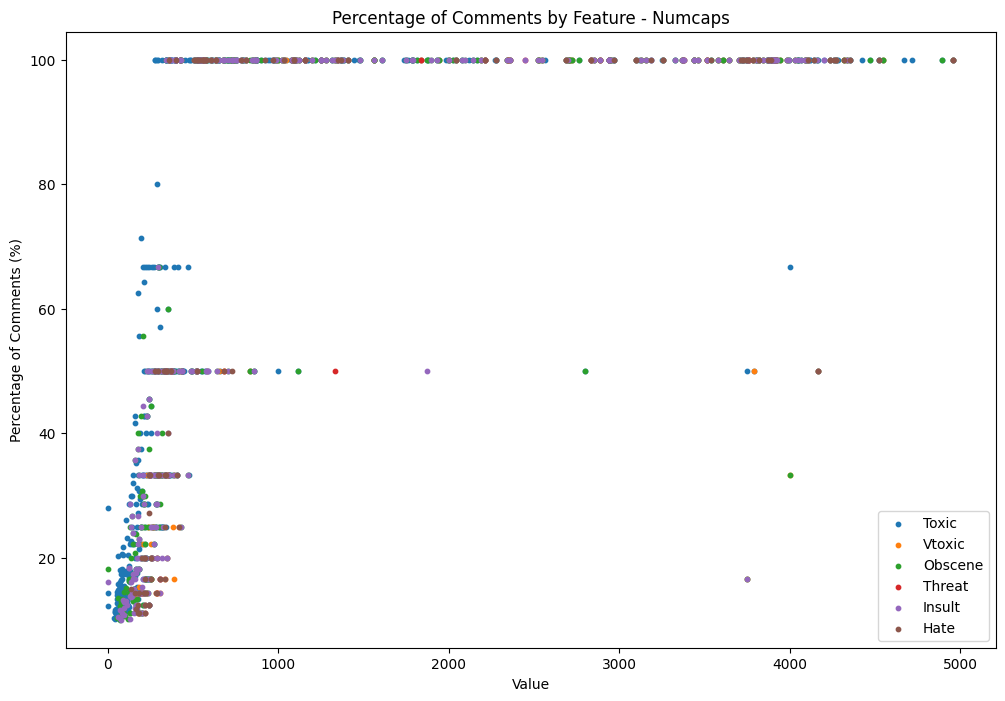

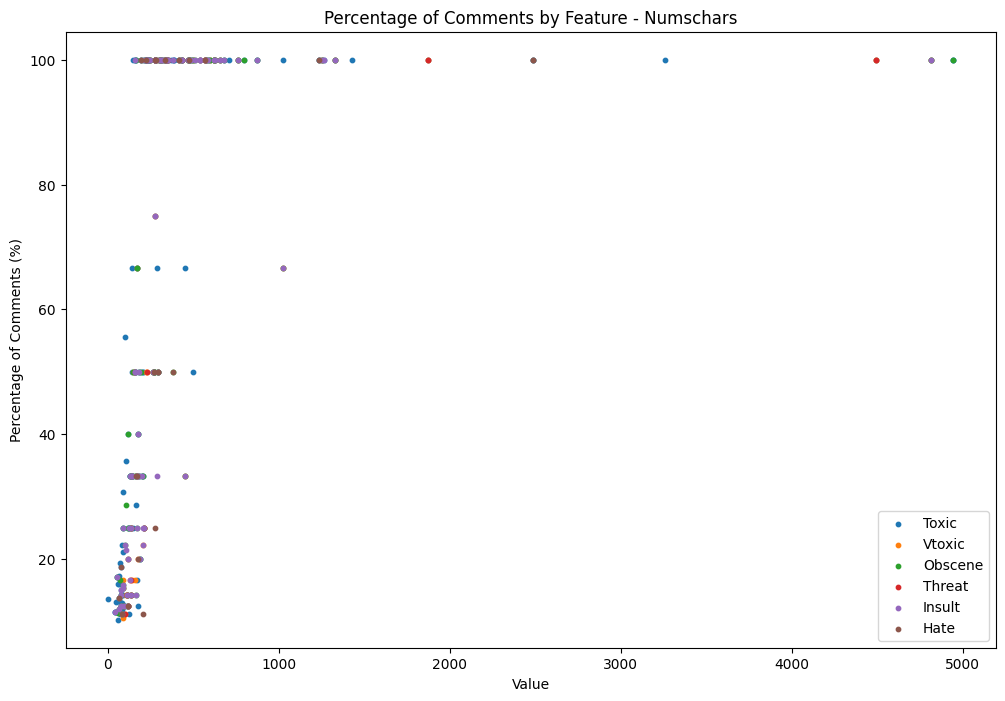

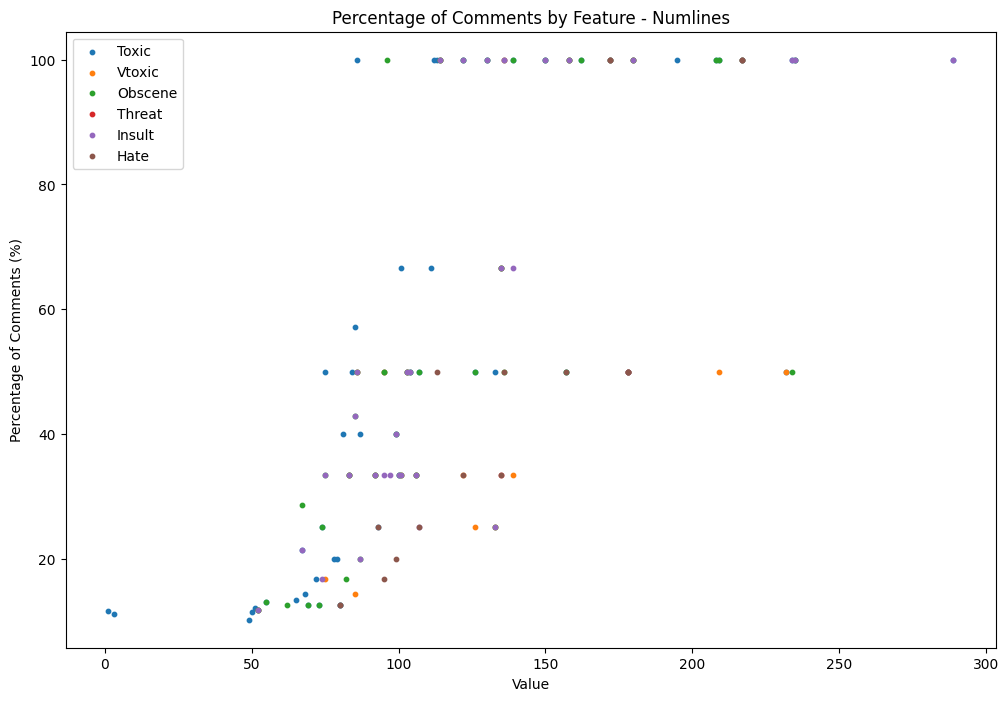

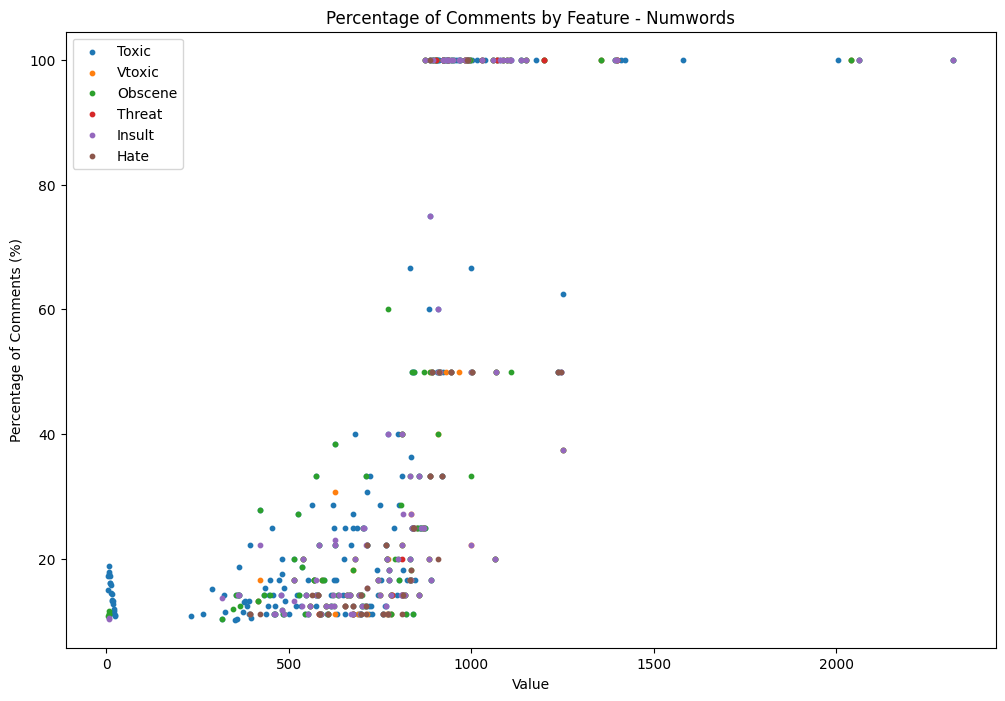

In [41]:
# Create combined scatter plots for each feature
for feature in features:
    plt.figure(figsize=(12, 8)) 
    
    # Plotting each parameter with a different color
    for param in params:
        param_counts = []
        x_values = []

        # Calculate the maximum value for the current feature
        max_value = df_en[feature].max()

        for i in range(0, max_value + 1):
            # Total comments of this feature value
            total_count = len(df_en[df_en[feature] == i])  
            # Param comments of this feature value
            param_count = len(df_en[(df_en[param] == 1) & (df_en[feature] == i)])  
            
            # Calculating percentage if total_count > 0
            if total_count > 0 and param_count > total_count * 0.1:
                percentage = (param_count / total_count) * 100
                param_counts.append(percentage)
                x_values.append(i)  # Only include x value if valid

        # Plot the feature for the current parameter
        plt.scatter(x_values, param_counts, label=f"{param.title()}", s=10)

    plt.xlabel("Value")
    plt.ylabel(f"Percentage of Comments (%)")
    plt.title(f"Percentage of Comments by Feature - {feature.title()}")
    plt.legend()
    plt.savefig(f"Analysis Graphs/Combined_{feature.title()}.png")
    plt.show()